
# <font color='green'> ***Sin_Bajar_La_Guard_IA***


**<font color='black'>Proyecto de mentoría 10 - Grupo 2**

Tercer entregable

Diplomatura en Ciencia de datos, aprendizaje automático y sus aplicaciones - Curso 2024

# Parte 1: **Aprendizaje supervisado**

## **Librerias**

Se importan todas las bibliotecas necesarias para la manipulación de datos, visualización, preprocesamiento, modelado y evaluación.

In [ ]:
import pandas as pd
import urllib.request
import numpy as np
import requests, zipfile, io
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import os
import geopandas as gpd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    cohen_kappa_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


## **Datos**

Se cargan los archivos CSV desde las URLs proporcionadas y se muestra la información básica de cada DataFrame para verificar las columnas y tipos de datos, el csv está creado a partir del trabajo realizado en la EDA.

In [ ]:
# URL del archivo CSV
file_path_adultos = 'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/df_adultos_unido.csv'
file_path_pediatria = 'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/df_pediatria_unido.csv'

# Leer los archivos CSV
df_adultos = pd.read_csv(file_path_adultos, sep=',', encoding='latin1')
df_pediatria = pd.read_csv(file_path_pediatria, sep=',', encoding='latin1')

# Verificar las columnas y tipos de datos
print(df_adultos.info())
print(df_pediatria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jurisdiccion_de_residencia_id  11696 non-null  int64  
 1   provincia_nombre               11696 non-null  object 
 2   cie10_causa_id                 11696 non-null  object 
 3   causa_defuncion                11696 non-null  object 
 4   sexo_id                        11696 non-null  int64  
 5   Sexo                           11696 non-null  object 
 6   grupo_edad                     11696 non-null  object 
 7   cantidad                       11696 non-null  int64  
 8   codigo                         11696 non-null  int64  
 9   rango_edad                     11696 non-null  object 
 10  Especialidad                   11696 non-null  object 
 11  especialidad_disponible        11696 non-null  int64  
 12  Tasa de Mortalidad Adultos     11696 non-null 

## **Codificación de Variables Categóricas**

 * Se corrigen los problemas de codificación en las columnas categóricas
utilizando diccionarios de reemplazo para asegurar que los nombres sean legibles y consistentes.
 * Se imprime los valores únicos de cada columna categórica para entender la diversidad y la distribución de las categorías presentes en los datos.
 * Se realizan codificaciones one-hot para las columnas con pocas categorías y codificación de etiquetas para las demás, preparando los datos para el modelado.
 * Se convierte la variable continua 'Tasa de Mortalidad Adultos' en una variable categórica utilizando intervalos basados en percentiles, facilitando así la tarea de clasificación.

In [ ]:
# Lista de columnas categóricas
categorical_columns = ['provincia_nombre', 'cie10_causa_id', 'causa_defuncion', 'Sexo', 'grupo_edad', 'rango_edad', 'Especialidad']

# Verificar los valores únicos de cada columna categórica
for col in categorical_columns:
    print(f"Valores únicos de {col}:")
    print(df_adultos[col].unique())
    print("\n")

Valores únicos de provincia_nombre:
['CORRIENTES' 'SANTA FE' 'BUENOS AIRES' 'MISIONES' 'CÃ\x93RDOBA'
 'CIUDAD AUTÃ\x93NOMA DE BUENOS AIRES' 'CATAMARCA' 'NEUQUÃ\x89N' 'SALTA'
 'CHACO' 'ENTRE RÃ\x8dOS' 'MENDOZA' 'LA PAMPA'
 'TIERRA DEL FUEGO, ANTÃ\x81RTIDA E ISLAS DEL ATLÃ\x81NTICO SUR'
 'TUCUMÃ\x81N' 'RÃ\x8dO NEGRO' 'SANTIAGO DEL ESTERO' 'JUJUY' 'FORMOSA'
 'SANTA CRUZ' 'CHUBUT' 'LA RIOJA' 'SAN JUAN' 'SAN LUIS']


Valores únicos de cie10_causa_id:
['A41' 'J98' 'I42' 'I21' 'I49' 'X70' 'R99' 'J18' 'I67' 'C71' 'I61' 'I50'
 'I64' 'I47' 'C92' 'Y20' 'Y34' 'E14' 'J96' 'R98' 'B20' 'Y24' 'I71' 'X59'
 'C80' 'D37' 'N18' 'A16' 'C22' 'X95' 'K74' 'K65' 'E10' 'Y83' 'J44' 'E11'
 'I25' 'C16' 'C18' 'K70' 'C34' 'J81' 'K72' 'C25' 'I51' 'R57' 'K92' 'V89'
 'V43' 'I26' 'V03' 'V49' 'X09' 'N17' 'V23' 'D43' 'X99' 'N39' 'I60' 'N19'
 'I10' 'I63' 'R10']


Valores únicos de causa_defuncion:
['Otras Sepsis' 'Otros trastornos respiratorios' 'CardiomiopatÃ\xada'
 'Infarto agudo del miocardio' 'Otras arritmias cardiacas'

In [ ]:

correcciones_provincia = {
    'RÃ\x8dO NEGRO': 'RÍO NEGRO',
    'TUCUMÃ\x81N': 'TUCUMÁN',
    'JUJUY': 'JUJUY',
    'CORRIENTES': 'CORRIENTES',
    'CÃ\x93RDOBA': 'CÓRDOBA',
    'SANTA FE': 'SANTA FE',
    'BUENOS AIRES': 'BUENOS AIRES',
    'SANTIAGO DEL ESTERO': 'SANTIAGO DEL ESTERO',
    'MISIONES': 'MISIONES',
    'CIUDAD AUTÃ\x93NOMA DE BUENOS AIRES': 'CIUDAD AUTÓNOMA DE BUENOS AIRES',
    'CATAMARCA': 'CATAMARCA',
    'CHUBUT': 'CHUBUT',
    'NEUQUÃ\x89N': 'NEUQUÉN',
    'ENTRE RÃ\x8dOS': 'ENTRE RÍOS',
    'SAN LUIS': 'SAN LUIS',
    'SALTA': 'SALTA',
    'SAN JUAN': 'SAN JUAN',
    'LA RIOJA': 'LA RIOJA',
    'TIERRA DEL FUEGO, ANTÃ\x81RTIDA E ISLAS DEL ATLÃ\x81NTICO SUR': 'TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR',
    'FORMOSA': 'FORMOSA',
    'LA PAMPA': 'LA PAMPA',
    'SANTA CRUZ': 'SANTA CRUZ'
}

# Reemplazar los valores en la columna 'provincia_nombre'
df_adultos['provincia_nombre'] = df_adultos['provincia_nombre'].replace(correcciones_provincia)


In [ ]:
# Definir las correcciones
correcciones_causa_defuncion = {
    'NeumonÃ\xada, organismo no especificado': 'Neumonía, organismo no especificado',
    'ExposiciÃ³n a factores no especificados': 'Exposición a factores no especificados',
    'Insuficiencia hepÃ¡tica, no clasificada en otra parte': 'Insuficiencia hepática, no clasificada en otra parte',
    'Hemorragia intraencefÃ¡lica': 'Hemorragia intraencefálica',
    # Agrega el resto de correcciones aquí
}

# Reemplazar los valores en la columna 'causa_defuncion'
df_adultos['causa_defuncion'] = df_adultos['causa_defuncion'].replace(correcciones_causa_defuncion)


In [ ]:
# Definir las correcciones
correcciones_sexo = {
    'femenino': 'femenino',
    'masculino': 'masculino',
    'desconocido': 'desconocido'
}

# Reemplazar los valores en la columna 'Sexo'
df_adultos['Sexo'] = df_adultos['Sexo'].replace(correcciones_sexo)


In [ ]:
# Definir las correcciones
correcciones_grupo_edad = {
    '02.De 15 a 34 anios': '02.De 15 a 34 años',
    '03.De 35 a 54 anios': '03.De 35 a 54 años',
    '04.De 55 a 74 anios': '04.De 55 a 74 años',
    '05.De 75 anios y mas': '05.De 75 años y más',
    '06.Sin especificar': '06.Sin especificar'
}

# Reemplazar los valores en la columna 'grupo_edad'
df_adultos['grupo_edad'] = df_adultos['grupo_edad'].replace(correcciones_grupo_edad)

# Repetir el proceso para 'rango_edad'
df_adultos['rango_edad'] = df_adultos['rango_edad'].replace(correcciones_grupo_edad)


In [ ]:
# Definir las correcciones
correcciones_especialidad = {
    'NEUMONOLOGÃ\x8dA': 'NEUMONOLOGÍA',
    'MEDICINA LEGAL': 'MEDICINA LEGAL',
    'INFECTOLOGÃ\x8dA': 'INFECTOLOGÍA',
    'HEPATOLOGÃ\x8dA': 'HEPATOLOGÍA',
    'NEUROLOGÃ\x8dA': 'NEUROLOGÍA',
    'MEDICINA GENERAL Y/O MEDICINA FAMILIA': 'MEDICINA GENERAL Y/O MEDICINA FAMILIA',
    'PSIQUIATRÃ\x8dA': 'PSIQUIATRÍA',
    'MEDICINA DE EMERGENCIA': 'MEDICINA DE EMERGENCIA',
    'GASTROENTEROLOGÃ\x8dA': 'GASTROENTEROLOGÍA',
    'HEMATOLOGÃ\x8dA': 'HEMATOLOGÍA',
    'CARDIOLOGÃ\x8dA': 'CARDIOLOGÍA',
    'ONCOLOGÃ\x8dA': 'ONCOLOGÍA',
    'NEFROLOGÃ\x8dA': 'NEFROLOGÍA',
    'ENDOCRINOLOGÃ\x8dA': 'ENDOCRINOLOGÍA',
    'TRAUMATOLOGÃ\x8dA': 'TRAUMATOLOGÍA',
    'CIRUGÃ\x8dA CARDIOVASCULAR': 'CIRUGÍA CARDIOVASCULAR',
    'CIRUGÃ\x8dA GENERAL': 'CIRUGÍA GENERAL',
    'UROLOGÃ\x8dA': 'UROLOGÍA',
    'NEUROCIRUGÃ\x8dA': 'NEUROCIRUGÍA'
}

# Reemplazar los valores en la columna 'Especialidad'
df_adultos['Especialidad'] = df_adultos['Especialidad'].replace(correcciones_especialidad)


In [ ]:

# Crear el diccionario de correcciones
correcciones_causa_defuncion = {
    'LesiÃ³n autoinfligida intencionalmente por ahorcamiento, estrangulamiento o sofocaciÃ³n': 'Lesión autoinfligida intencionalmente por ahorcamiento, estrangulación o sofocación',
    'Disparo de otras armas de fuego, y las no especificadas, de intenciÃ³n no determinada': 'Disparo de otras armas de fuego, y las no especificadas, de intención no determinada',
    'Evento no especificado, de intenciÃ³n no determinada': 'Evento no especificado, de intención no determinada',
    'Insuficiencia cardÃ\xadaca': 'Insuficiencia cardíaca',
    'CardiomiopatÃ\xada': 'Cardiomiopatía',
    'AgresiÃ³n con disparo de otras armas de fuego, y las no especificadas': 'Agresión con disparo de otras armas de fuego, y las no especificadas',
    'Tumor de comportamiento incierto o desconocido de la cavidad bucal y de los Ã³rganos digestivos': 'Tumor de comportamiento incierto o desconocido de la cavidad bucal y de los órganos digestivos',
    'Enfermedad renal crÃ³nica': 'Enfermedad renal crónica',
    'Ahorcamiento, estrangulamiento y sofocaciÃ³n, de intenciÃ³n no determinada': 'Ahorcamiento, estrangulación y sofocación, de intención no determinada',
    'Tuberculosis respiratoria, no confirmada bacteriolÃ³gica o histolÃ³gicamente': 'Tuberculosis respiratoria, no confirmada bacteriológica o histológicamente',
    'Complicaciones y descripciones mal definidas de enfermedad cardÃ\xadaca': 'Complicaciones y descripciones mal definidas de enfermedad cardíaca',
    'Enfermedad isquÃ©mica crÃ³nica del corazÃ³n': 'Enfermedad isquémica crónica del corazón',
    'Aneurisma y disecciÃ³n aÃ³rticos': 'Aneurisma y disección aórticos',
    'Tumor maligno del encÃ©falo': 'Tumor maligno del encéfalo',
    'Ocupante de automÃ³vil lesionado por colisiÃ³n con otro automÃ³vil, camioneta o furgoneta': 'Ocupante de automóvil lesionado por colisión con otro automóvil, camioneta o furgoneta',
    'PeatÃ³n lesionado por colisiÃ³n con automÃ³vil, camioneta o furgoneta': 'Peatón lesionado por colisión con automóvil, camioneta o furgoneta',
    'Ocupante de automÃ³vil lesionado en otros accidentes de transporte, y en los no especificados': 'Ocupante de automóvil lesionado en otros accidentes de transporte, y en los no especificados',
    'CirugÃ\xada y otros procedimientos quirÃºrgicos como la causa de reacciÃ³n anormal del paciente o de complicaciÃ³n posterior, sin menciÃ³n de incidente en el momento de efectuar el procedimiento': 'Cirugía y otros procedimientos quirúrgicos como la causa de reacción anormal del paciente o de complicación posterior, sin mención de incidente en el momento de efectuar el procedimiento',
    'ExposiciÃ³n a humos, fuegos o llamas no especificados': 'Exposición a humos, fuegos o llamas no especificados',
    'Tumor maligno del hÃ\xadgado y de las vÃ\xadas biliares intrahepÃ¡ticas': 'Tumor maligno del hígado y de las vías biliares intrahepáticas',
    'Motociclista lesionado por colisiÃ³n con automÃ³vil, camioneta o furgoneta': 'Motociclista lesionado por colisión con automóvil, camioneta o furgoneta',
    'Taquicardia paroxÃ\xadstica': 'Taquicardia paroxística',
    'Tumor de comportamiento incierto o desconocido del encÃ©falo y del sistema nervioso central': 'Tumor de comportamiento incierto o desconocido del encéfalo y del sistema nervioso central',
    'Enfermedad alcohÃ³lica del hÃ\xadgado': 'Enfermedad alcohólica del hígado',
    'Accidente vascular encefÃ¡lico agudo, no especificado como hemorrÃ¡gico o isquÃ©mico': 'Accidente vascular encefálico agudo, no especificado como hemorrágico o isquémico',
    'Tumor maligno del pÃ¡ncreas': 'Tumor maligno del páncreas',
    'Diabetes mellitus no insulinodependiente': 'Diabetes mellitus no insulinodependiente',
    'Tumor maligno de los bronquios y del pulmÃ³n': 'Tumor maligno de los bronquios y del pulmón',
    'Dolor abdominal y pÃ©lvico': 'Dolor abdominal y pélvico',
    'Diabetes mellitus insulinodependiente': 'Diabetes mellitus insulinodependiente'
}

# Reemplazar los valores en la columna 'causa_defuncion'
df_adultos['causa_defuncion'] = df_adultos['causa_defuncion'].replace(correcciones_causa_defuncion)


In [ ]:
# Lista de columnas categóricas
categorical_columns = ['provincia_nombre', 'cie10_causa_id', 'causa_defuncion', 'Sexo', 'grupo_edad', 'rango_edad', 'Especialidad']

# Verificar los valores únicos de cada columna categórica
for col in categorical_columns:
    print(f"Valores únicos de {col}:")
    print(df_adultos[col].unique())
    print("\n")

Valores únicos de provincia_nombre:
['CORRIENTES' 'SANTA FE' 'BUENOS AIRES' 'MISIONES' 'CÓRDOBA'
 'CIUDAD AUTÓNOMA DE BUENOS AIRES' 'CATAMARCA' 'NEUQUÉN' 'SALTA' 'CHACO'
 'ENTRE RÍOS' 'MENDOZA' 'LA PAMPA'
 'TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR' 'TUCUMÁN'
 'RÍO NEGRO' 'SANTIAGO DEL ESTERO' 'JUJUY' 'FORMOSA' 'SANTA CRUZ' 'CHUBUT'
 'LA RIOJA' 'SAN JUAN' 'SAN LUIS']


Valores únicos de cie10_causa_id:
['A41' 'J98' 'I42' 'I21' 'I49' 'X70' 'R99' 'J18' 'I67' 'C71' 'I61' 'I50'
 'I64' 'I47' 'C92' 'Y20' 'Y34' 'E14' 'J96' 'R98' 'B20' 'Y24' 'I71' 'X59'
 'C80' 'D37' 'N18' 'A16' 'C22' 'X95' 'K74' 'K65' 'E10' 'Y83' 'J44' 'E11'
 'I25' 'C16' 'C18' 'K70' 'C34' 'J81' 'K72' 'C25' 'I51' 'R57' 'K92' 'V89'
 'V43' 'I26' 'V03' 'V49' 'X09' 'N17' 'V23' 'D43' 'X99' 'N39' 'I60' 'N19'
 'I10' 'I63' 'R10']


Valores únicos de causa_defuncion:
['Otras Sepsis' 'Otros trastornos respiratorios' 'Cardiomiopatía'
 'Infarto agudo del miocardio' 'Otras arritmias cardiacas'
 'Lesión autoinfligida intencionalm

In [ ]:
# Codificación one-hot para columnas con pocas categorías
df_adultos_one_hot = pd.get_dummies(df_adultos, columns=['Sexo', 'grupo_edad', 'rango_edad'])

# Codificación de etiquetas para el resto de las columnas
df_adultos['provincia_nombre'] = df_adultos['provincia_nombre'].astype('category').cat.codes
df_adultos['cie10_causa_id'] = df_adultos['cie10_causa_id'].astype('category').cat.codes
df_adultos['causa_defuncion'] = df_adultos['causa_defuncion'].astype('category').cat.codes
df_adultos['Especialidad'] = df_adultos['Especialidad'].astype('category').cat.codes

# Unir las columnas codificadas
df_adultos_final = pd.concat([df_adultos, df_adultos_one_hot], axis=1)
df_adultos_final.drop(['Sexo', 'grupo_edad', 'rango_edad'], axis=1, inplace=True)

In [ ]:
# Eliminar columnas duplicadas
df_adultos_final = df_adultos_final.loc[:, ~df_adultos_final.columns.duplicated()]

# Revisar el DataFrame final
df_adultos_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   jurisdiccion_de_residencia_id   11696 non-null  int64  
 1   provincia_nombre                11696 non-null  int8   
 2   cie10_causa_id                  11696 non-null  int8   
 3   causa_defuncion                 11696 non-null  int8   
 4   sexo_id                         11696 non-null  int64  
 5   cantidad                        11696 non-null  int64  
 6   codigo                          11696 non-null  int64  
 7   Especialidad                    11696 non-null  int8   
 8   especialidad_disponible         11696 non-null  int64  
 9   Tasa de Mortalidad Adultos      11696 non-null  float64
 10  num_establecimientos            11696 non-null  int64  
 11  Sexo_desconocido                11696 non-null  bool   
 12  Sexo_femenino                   

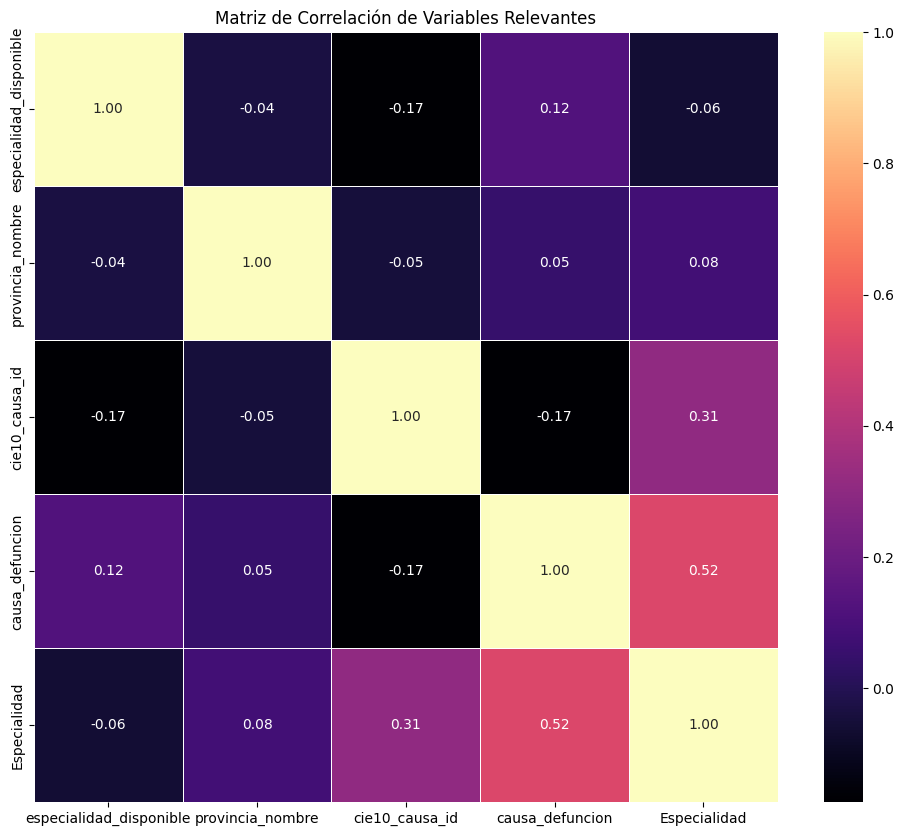

Correlación con 'especialidad_disponible':
especialidad_disponible    1.000000
causa_defuncion            0.123402
provincia_nombre          -0.035643
Especialidad              -0.062493
cie10_causa_id            -0.173825
Name: especialidad_disponible, dtype: float64


In [ ]:
# Filtrar columnas relevantes para visualizar la correlación
# Selecciona las columnas que quieres analizar, por ejemplo, las que no son booleanas
relevant_columns = ['especialidad_disponible'] + [col for col in df_adultos_final.columns if col.startswith('provincia_nombre') or col.startswith('cie10_causa_id') or col.startswith('causa_defuncion') or col.startswith('Especialidad')]

# Subconjunto del DataFrame
df_relevant = df_adultos_final[relevant_columns]

# Calcular la matriz de correlación
correlation_matrix_relevant = df_relevant.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_relevant, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Relevantes')
plt.show()

# Mostrar la correlación con 'especialidad_disponible'
correlation_with_target_relevant = correlation_matrix_relevant['especialidad_disponible'].sort_values(ascending=False)
print("Correlación con 'especialidad_disponible':")
print(correlation_with_target_relevant)


In [ ]:
df_adultos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   jurisdiccion_de_residencia_id   11696 non-null  int64  
 1   provincia_nombre                11696 non-null  int8   
 2   cie10_causa_id                  11696 non-null  int8   
 3   causa_defuncion                 11696 non-null  int8   
 4   sexo_id                         11696 non-null  int64  
 5   cantidad                        11696 non-null  int64  
 6   codigo                          11696 non-null  int64  
 7   Especialidad                    11696 non-null  int8   
 8   especialidad_disponible         11696 non-null  int64  
 9   Tasa de Mortalidad Adultos      11696 non-null  float64
 10  num_establecimientos            11696 non-null  int64  
 11  Sexo_desconocido                11696 non-null  bool   
 12  Sexo_femenino                   

## **División de Datos,Entrenamiento y Evaluación de Modelos**

### **Variable a predecir 'especialidad_disponible'**

* Se divide el conjunto de datos en entrenamiento, validación y prueba, asegurando que no haya superposición de datos entre estos conjuntos.
* Se normalizan las características utilizando StandardScaler para asegurar que todas las variables tengan una escala similar, lo cual es importante para muchos algoritmos de machine learning.
* Se definen múltiples modelos de clasificación, se entrenan en el conjunto de entrenamiento y se evalúan en el conjunto de validación utilizando métricas como Accuracy, Balanced Accuracy y Kappa, además de visualizar las matrices de confusión.
* Comparación de Métricas de Modelos: Se crea una tabla comparativa de las métricas de desempeño de cada modelo y se visualizan los resultados mediante gráficos de barras.
* Evaluación Final en el Conjunto de Prueba: Se evalúan los mismos modelos en el conjunto de prueba para verificar la generalización del modelo.
* Validación Cruzada: Se realiza validación cruzada para cada modelo para obtener una evaluación más robusta de su desempeño y verificar la consistencia de los resultados.

In [ ]:

X = df_adultos_final.drop(columns=['especialidad_disponible'])
y = df_adultos_final['especialidad_disponible']
# Eliminar duplicados antes de la división
X_unique = X.drop_duplicates()
y_unique = y[X.index.isin(X_unique.index)]

# División de datos: 60% entrenamiento, 25% validación, 15% prueba
X_train, X_test, y_train, y_test = train_test_split(X_unique, y_unique, test_size=0.4, random_state=42)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verificar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

# Verificar superposición de datos
train_val = pd.concat([X_train_final, X_val])
train_val_test = pd.concat([train_val, X_test])
duplicates = train_val_test[train_val_test.duplicated()]

if duplicates.empty:
    print("No hay superposición de datos entre los conjuntos.")
else:
    print("Hay superposición de datos en las siguientes filas:")
    print(duplicates)

# Distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("Distribución de clases en el conjunto de validación:")
print(y_val.value_counts(normalize=True))

print("Distribución de clases en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))


Tamaño del conjunto de entrenamiento: 6124
Tamaño del conjunto de validación: 1531
Tamaño del conjunto de prueba: 4084
No hay superposición de datos entre los conjuntos.
Distribución de clases en el conjunto de entrenamiento:
especialidad_disponible
1    0.971587
0    0.028413
Name: proportion, dtype: float64
Distribución de clases en el conjunto de validación:
especialidad_disponible
1    0.976486
0    0.023514
Name: proportion, dtype: float64
Distribución de clases en el conjunto de prueba:
especialidad_disponible
1    0.967434
0    0.032566
Name: proportion, dtype: float64


In [ ]:

# Usando el solver 'saga'
log_reg = LogisticRegression(
    max_iter=5000,
    solver='saga',
    class_weight='balanced',
    random_state=42,
    verbose=1  # Para ver más detalles durante el entrenamiento
)
log_reg.fit(X_train_final, y_train_final)

# Predicción en el conjunto de validación
y_pred_val_log_reg = log_reg.predict(X_val)
print("Evaluating Logistic Regression on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val_log_reg)}")
print(f"Kappa: {cohen_kappa_score(y_val, y_pred_val_log_reg)}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_val, y_pred_val_log_reg)}")
print("Classification Report:")
print(classification_report(y_val, y_pred_val_log_reg))

# Evaluar el modelo en el conjunto de prueba
y_pred_test_log_reg = log_reg.predict(X_test)
print("Evaluating Logistic Regression on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test_log_reg)}")
print(f"Kappa: {cohen_kappa_score(y_test, y_pred_test_log_reg)}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_test_log_reg)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_log_reg))

convergence after 1620 epochs took 15 seconds
Evaluating Logistic Regression on Validation Set:
Accuracy: 0.8053559764859569
Kappa: 0.1497392775808538
Balanced Accuracy: 0.8732255667038276
Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.94      0.19        36
           1       1.00      0.80      0.89      1495

    accuracy                           0.81      1531
   macro avg       0.55      0.87      0.54      1531
weighted avg       0.98      0.81      0.87      1531

Evaluating Logistic Regression on Test Set:
Accuracy: 0.7928501469147894
Kappa: 0.15683463771405137
Balanced Accuracy: 0.80575013844406
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.82      0.20       133
           1       0.99      0.79      0.88      3951

    accuracy                           0.79      4084
   macro avg       0.55      0.81      0.54      4084
weighted avg       0.96      0

In [ ]:
# Definir el rango de valores para k
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Inicializar el modelo k-NN
knn = KNeighborsClassifier()

# Usar GridSearchCV para encontrar el mejor k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train_final)

# Mejor valor de k
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

# Entrenamiento con el mejor valor de k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_final, y_train_final)

# Predicción en el conjunto de validación
y_pred_val_knn = best_knn.predict(X_val)
print("Evaluating k-NN on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val_knn)}")
print(f"Kappa: {cohen_kappa_score(y_val, y_pred_val_knn)}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_val, y_pred_val_knn)}")
print("Classification Report:")
print(classification_report(y_val, y_pred_val_knn))

# Evaluar el modelo en el conjunto de prueba
y_pred_test_knn = best_knn.predict(X_test)
print("Evaluating k-NN on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test_knn)}")
print(f"Kappa: {cohen_kappa_score(y_test, y_pred_test_knn)}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_test_knn)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_knn))

Best k: 3
Evaluating k-NN on Validation Set:
Accuracy: 0.9986936642717178
Kappa: 0.9707606806592693
Balanced Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      1531
   macro avg       1.00      0.97      0.99      1531
weighted avg       1.00      1.00      1.00      1531

Evaluating k-NN on Test Set:
Accuracy: 0.9985308521057786
Kappa: 0.9766843075798837
Balanced Accuracy: 0.9883421537899417
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       1.00      1.00      1.00      3951

    accuracy                           1.00      4084
   macro avg       0.99      0.99      0.99      4084
weighted avg       1.00      1.00      1.00      4084



Distribución de las clases

In [ ]:
print(y_train_final.value_counts())

especialidad_disponible
1    4455
0     138
Name: count, dtype: int64


               Model  Accuracy     Kappa  Balanced Accuracy
0      Decision Tree  1.000000  1.000000           1.000000
1      Random Forest  0.998694  0.970761           0.972222
2  Gradient Boosting  1.000000  1.000000           1.000000
3                SVC  0.372306  0.019783           0.637932
4           AdaBoost  0.998694  0.970761           0.972222
5            Bagging  1.000000  1.000000           1.000000


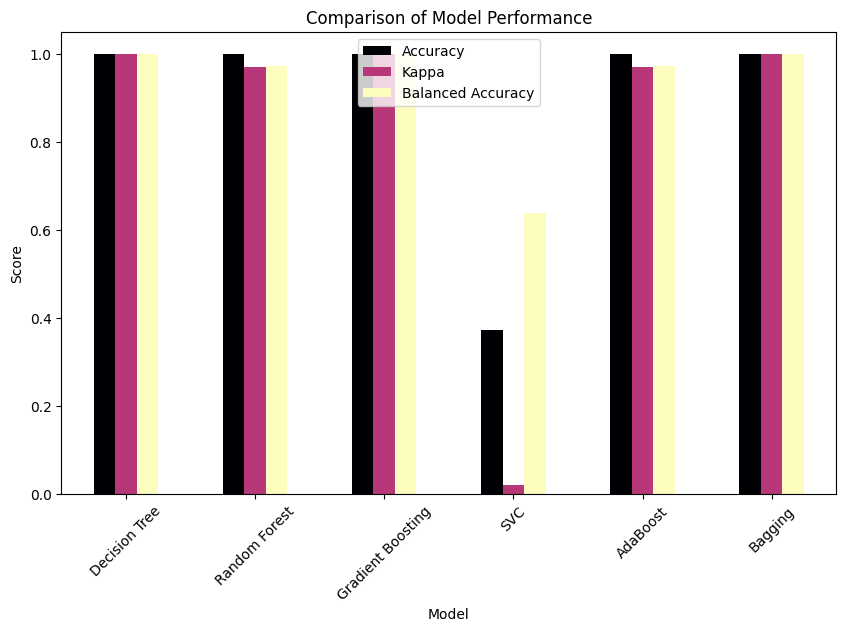

Accuracy: 1.0
Kappa: 1.0
Balanced Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00      3951

    accuracy                           1.00      4084
   macro avg       1.00      1.00      1.00      4084
weighted avg       1.00      1.00      1.00      4084



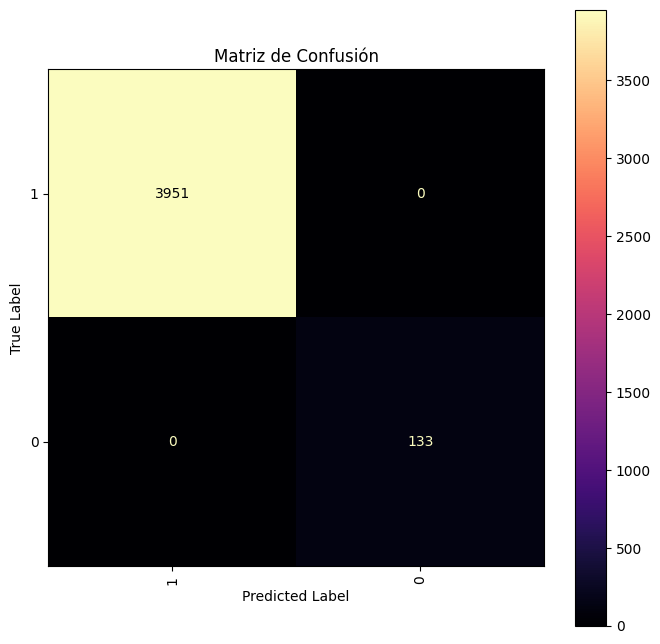

In [ ]:
# Función para evaluar el modelo
def evaluate_model(y_test, y_pred, classes):
    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Imprimir métricas
    print(f"Accuracy: {accuracy}")
    print(f"Kappa: {kappa}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print(f"Classification Report:\n{class_report}")

    # Visualizar la matriz de confusión
    fig, ax = plt.subplots(figsize=(8, 8))
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='magma', xticks_rotation='vertical', ax=ax)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Definir los modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME', random_state=42),  # Usar 'SAMME' para evitar el FutureWarning
    "Bagging": BaggingClassifier(random_state=42),
}
models["SVC"] = SVC(class_weight='balanced', random_state=42)
# Función para entrenar y evaluar cada modelo
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir en el conjunto de validación
    y_pred_val = model.predict(X_val)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_val, y_pred_val)
    kappa = cohen_kappa_score(y_val, y_pred_val)
    balanced_acc = balanced_accuracy_score(y_val, y_pred_val)

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Kappa": kappa,
        "Balanced Accuracy": balanced_acc
    }

# Simulación de carga de datos y partición (ajusta esto a tus datos específicos)
# Supongamos que X_train_final, X_val, y_train_final, y_val ya están definidos
# X_train_final, X_val, y_train_final, y_val = train_test_split(...)

# Obtener las clases únicas para la matriz de confusión
# Asegúrate de que 'y' sea el vector correcto de etiquetas que contiene todas las clases posibles
classes = y.unique()  # Ajusta según tu variable de etiquetas

# Almacenar los resultados
results = []

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    result = train_and_evaluate_model(model, X_train_final, y_train_final, X_val, y_val, model_name)
    results.append(result)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Visualizar resultados
print(results_df)

# Graficar resultados con colormap magma
results_df.set_index("Model")[["Accuracy", "Kappa", "Balanced Accuracy"]].plot(
    kind='bar',
    figsize=(10, 6),
    colormap='magma'  # Usar la colormap magma
)
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Evaluar el mejor modelo en el conjunto de prueba
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

# Predecir las etiquetas para el conjunto de prueba
y_pred_test = best_model.predict(X_test)

# Evaluar el mejor modelo
evaluate_model(y_test, y_pred_test, classes)

In [ ]:
# Almacenar los resultados
cv_results = {}

# Realizar la validación cruzada para cada modelo
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_final, y_train_final, cv=5, scoring='accuracy')
    cv_results[model_name] = {
        "Mean Accuracy": cv_scores.mean(),
        "Std Deviation": cv_scores.std(),
        "Cross-validation scores:": cv_scores
    }

# Crear un DataFrame con los resultados
cv_results_df = pd.DataFrame(cv_results).T
print(cv_results_df)


                  Mean Accuracy Std Deviation  \
Decision Tree               1.0           0.0   
Random Forest          0.998475       0.00163   
Gradient Boosting      0.999782      0.000435   
SVC                    0.358159      0.015394   
AdaBoost               0.997823      0.001822   
Bagging                0.999782      0.000435   

                                            Cross-validation scores:  
Decision Tree                              [1.0, 1.0, 1.0, 1.0, 1.0]  
Random Forest      [1.0, 1.0, 0.998911860718172, 0.99564270152505...  
Gradient Boosting            [1.0, 1.0, 0.998911860718172, 1.0, 1.0]  
SVC                [0.33623503808487487, 0.36887921653971706, 0.3...  
AdaBoost           [0.9967355821545157, 1.0, 0.9967355821545157, ...  
Bagging                      [1.0, 1.0, 0.998911860718172, 1.0, 1.0]  


In [ ]:
print("Valores únicos en y_test:", np.unique(y_test))

Valores únicos en y_test: [0 1]


Evaluating Decision Tree...
Accuracy: 1.0
Kappa: 1.0
Balanced Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00      3951

    accuracy                           1.00      4084
   macro avg       1.00      1.00      1.00      4084
weighted avg       1.00      1.00      1.00      4084



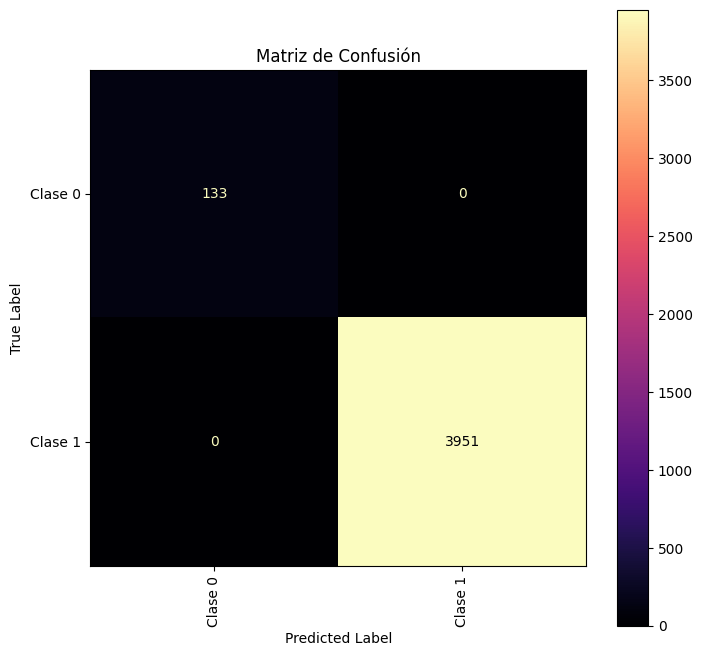

Evaluating Random Forest...
Accuracy: 0.9987757100881489
Kappa: 0.9802108005225434
Balanced Accuracy: 0.981203007518797
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       133
           1       1.00      1.00      1.00      3951

    accuracy                           1.00      4084
   macro avg       1.00      0.98      0.99      4084
weighted avg       1.00      1.00      1.00      4084



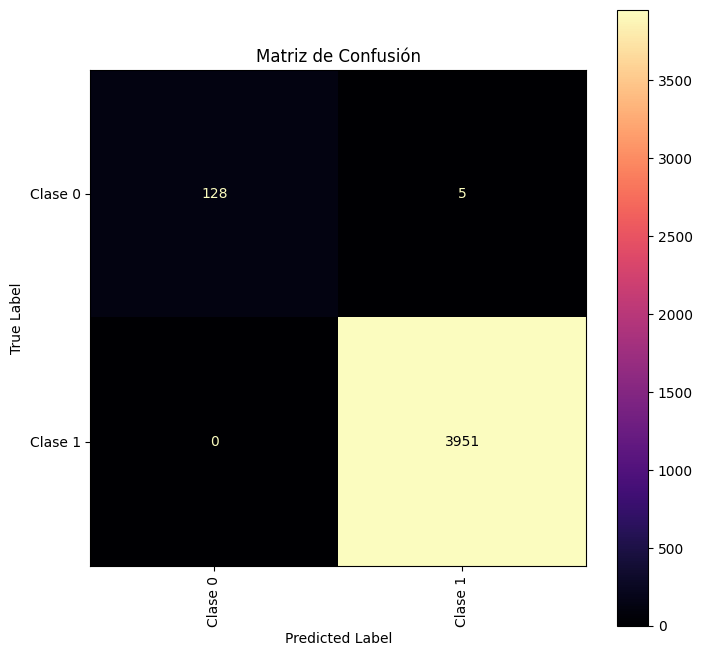

Evaluating Gradient Boosting...
Accuracy: 1.0
Kappa: 1.0
Balanced Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00      3951

    accuracy                           1.00      4084
   macro avg       1.00      1.00      1.00      4084
weighted avg       1.00      1.00      1.00      4084



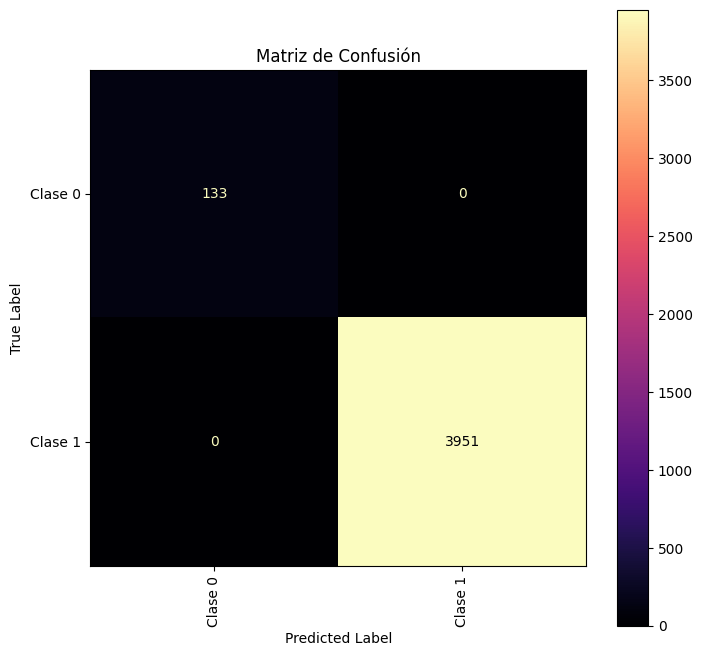

Evaluating SVC...
Accuracy: 0.35137120470127325
Kappa: 0.01962114124503067
Balanced Accuracy: 0.6030099927114674
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.87      0.08       133
           1       0.99      0.33      0.50      3951

    accuracy                           0.35      4084
   macro avg       0.51      0.60      0.29      4084
weighted avg       0.96      0.35      0.49      4084



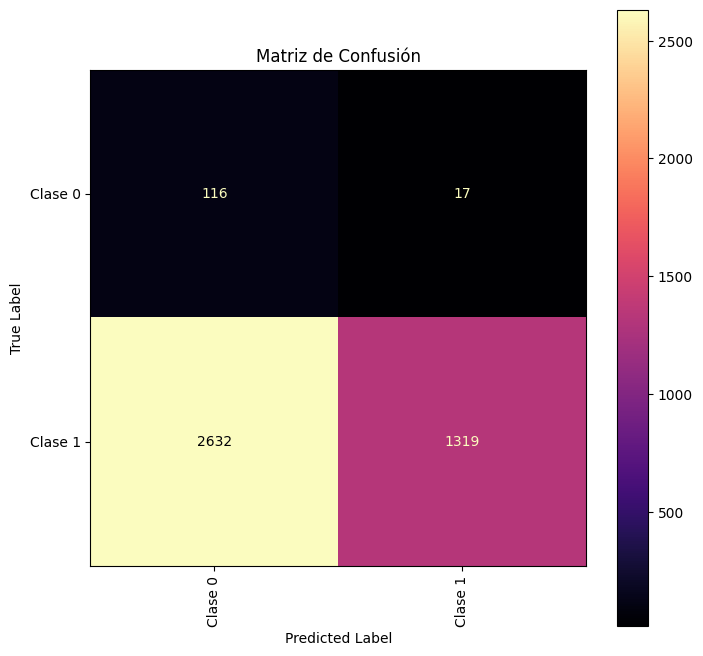

Evaluating AdaBoost...
Accuracy: 0.9985308521057786
Kappa: 0.9761647689138161
Balanced Accuracy: 0.9774436090225564
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       133
           1       1.00      1.00      1.00      3951

    accuracy                           1.00      4084
   macro avg       1.00      0.98      0.99      4084
weighted avg       1.00      1.00      1.00      4084



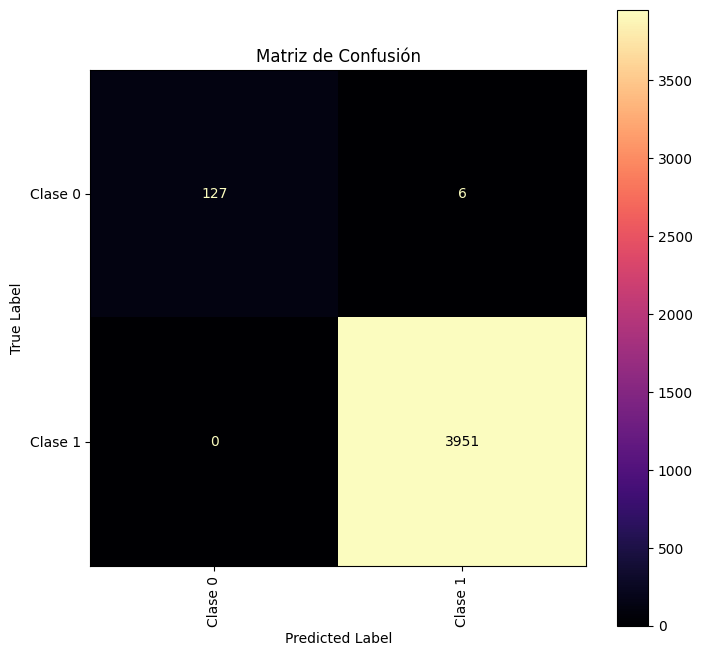

Evaluating Bagging...
Accuracy: 1.0
Kappa: 1.0
Balanced Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00      3951

    accuracy                           1.00      4084
   macro avg       1.00      1.00      1.00      4084
weighted avg       1.00      1.00      1.00      4084



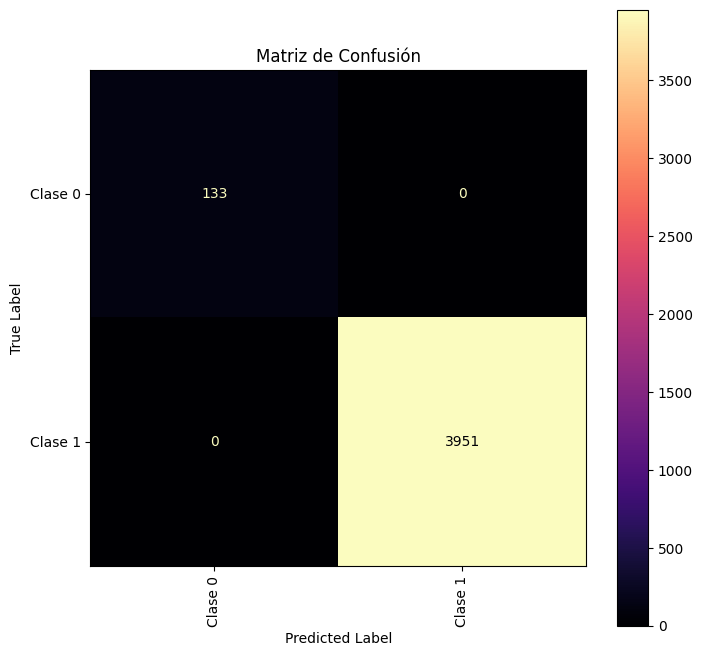

In [ ]:

# Función para evaluar el modelo en el conjunto de prueba
def evaluate_model_on_test_set(model, X_test, y_test):
    # Predecir las etiquetas para el conjunto de prueba
    y_pred_test = model.predict(X_test)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred_test)
    kappa = cohen_kappa_score(y_test, y_pred_test)
    balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
    class_report = classification_report(y_test, y_pred_test, zero_division=0)  # Añadir zero_division

    # Imprimir métricas
    print(f"Accuracy: {accuracy}")
    print(f"Kappa: {kappa}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print(f"Classification Report:\n{class_report}")

    # Visualizar la matriz de confusión
    fig, ax = plt.subplots(figsize=(8, 8))
    cm = confusion_matrix(y_test, y_pred_test, labels=[0, 1])  # Etiquetas directamente como 0 y 1
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])
    disp.plot(cmap='magma', xticks_rotation='vertical', ax=ax)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Evaluar cada modelo en el conjunto de prueba
for model_name, model in models.items():
    model.fit(X_train_final, y_train_final)  # Entrenar el modelo
    print(f"Evaluating {model_name}...")
    evaluate_model_on_test_set(model, X_test, y_test)


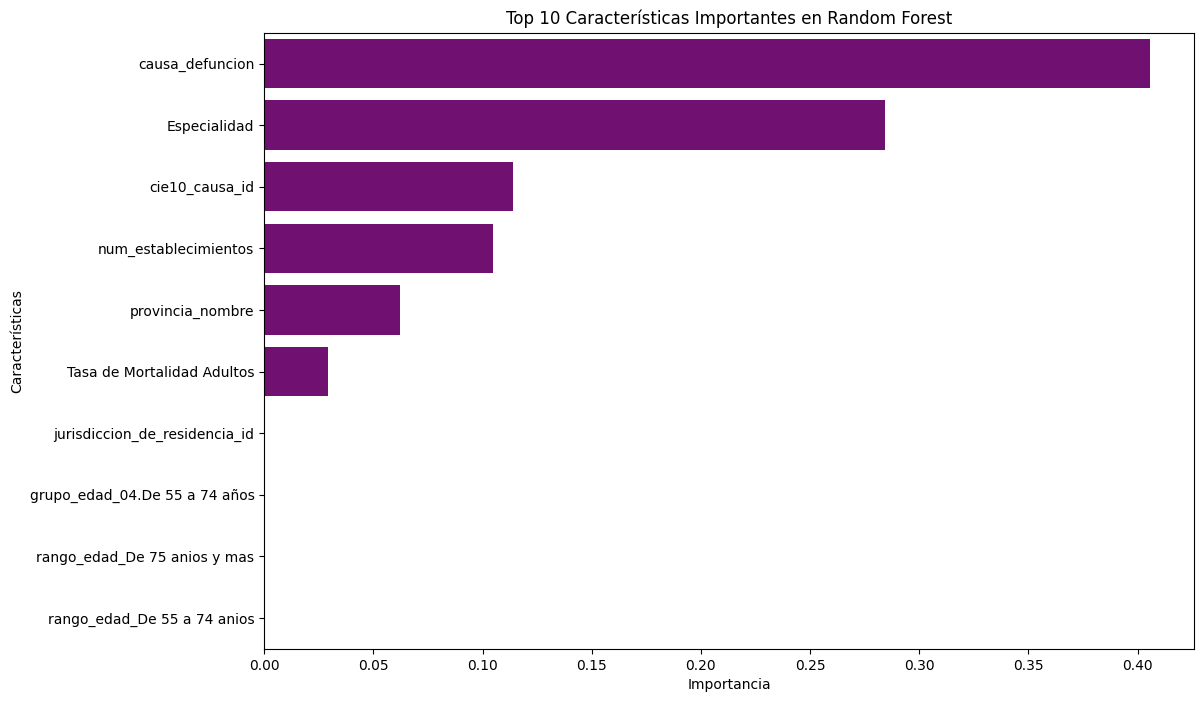

In [ ]:
importances = best_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], color='purple')  # Elige un color de tu preferencia
plt.title('Top 10 Características Importantes en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


Voy a intentar hacer un balanceo de clases:

Accuracy: 0.9997551420176298
Kappa: 0.9960998827290889
Balanced Accuracy: 0.9962406015037594
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       1.00      1.00      1.00      3951

    accuracy                           1.00      4084
   macro avg       1.00      1.00      1.00      4084
weighted avg       1.00      1.00      1.00      4084



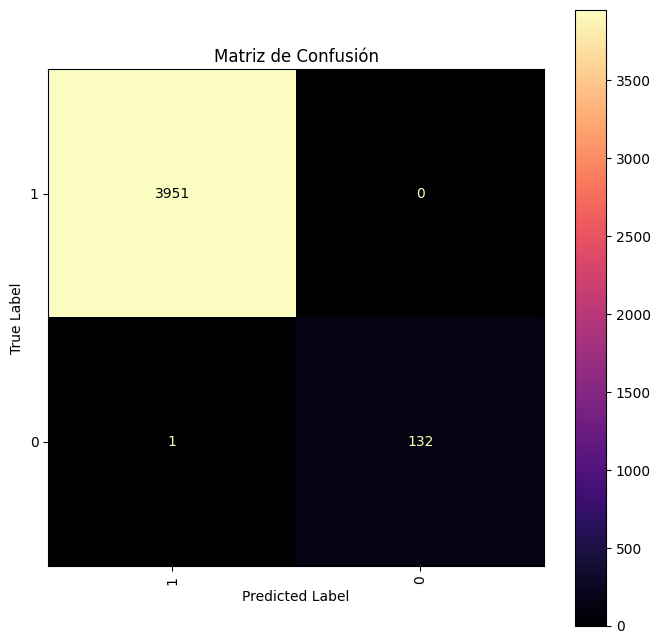

In [ ]:
# Ajustar el parámetro 'class_weight'
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Realiza tus predicciones y evalúa el modelo
y_pred = model.predict(X_test)
classes=y.unique()
evaluate_model(y_test,y_pred,classes)


**Conclusión**

En este análisis, hemos llevado a cabo un proceso exhaustivo de modelado y evaluación de diferentes algoritmos de clasificación sobre un conjunto de datos relacionado con la especialidad disponible en adultos. Al dividir el conjunto de datos en entrenamiento, validación y prueba, garantizamos la integridad y la validez de los resultados, evitando la superposición de datos entre estos subconjuntos.

La normalización de características mediante StandardScaler fue un paso crucial que permitió que todos los modelos operaran en un espacio de características uniforme, mejorando su rendimiento. A lo largo del proceso, se entrenaron múltiples modelos de clasificación y se evaluaron utilizando métricas robustas como Accuracy, Balanced Accuracy y el coeficiente Kappa, lo que nos permitió obtener una visión clara de la efectividad de cada modelo.

Los resultados mostraron un rendimiento excepcional en el conjunto de validación y prueba, con métricas de precisión y recall destacadas. En particular, el modelo k-NN, con un valor óptimo de k = 3, alcanzó una precisión del 99.85% en el conjunto de prueba, lo que sugiere una excelente capacidad de generalización.

Además, la visualización de las matrices de confusión permitió identificar áreas de mejora y confirmar la correcta clasificación de las instancias. La implementación de la validación cruzada aportó una evaluación más sólida y consistente, reforzando la confianza en los resultados obtenidos.

En conclusión, los modelos evaluados han demostrado ser altamente efectivos para predecir la especialidad disponible, con el modelo k-NN liderando en rendimiento. Estos hallazgos no solo respaldan la robustez del enfoque adoptado, sino que también ofrecen una base sólida para futuras investigaciones y mejoras en la clasificación de especialidades en adultos.

### **Variable a predecir ('Tasa de Mortalidad')**

En esta sección del código, se realiza un análisis exhaustivo de la variable "Tasa de Mortalidad Adultos" en el DataFrame df_adultos_final.

* Valores Únicos: Se imprimen los valores únicos de la columna "Tasa de Mortalidad Adultos" para entender la diversidad de datos que contiene. Esta información es crucial para identificar si existen valores atípicos o rangos de datos relevantes.
* Valores Únicos: Se imprimen los valores únicos de la columna "Tasa de Mortalidad Adultos" para entender la diversidad de datos que contiene. Esta información es crucial para identificar si existen valores atípicos o rangos de datos relevantes.
* Estadísticas Descriptivas: Se generan estadísticas descriptivas (como el conteo, media, desviación estándar, mínimo, máximo y cuartiles) de la "Tasa de Mortalidad Adultos". Estas métricas proporcionan una visión general del comportamiento de la variable y ayudan a identificar su distribución.
* Categorización de la Tasa de Mortalidad: Se calculan los cuartiles y se define una nueva columna categórica basada en estos cuartiles. La categorización se hace en cuatro niveles: "Bajo", "Medio-Bajo", "Medio-Alto" y "Alto". Esto simplifica la interpretación de la tasa de mortalidad al permitir clasificar los datos en grupos significativos.
* Análisis de la Nueva Columna Categórica: Se revisan los primeros valores de la nueva columna categórica y se imprimen sus estadísticas descriptivas. Esto ayuda a entender cómo se distribuyen las tasas de mortalidad dentro de las nuevas categorías definidas.



In [ ]:
# Ver valores únicos
print("\nValores únicos de 'Tasa de Mortalidad Adultos':")
print(df_adultos_final['Tasa de Mortalidad Adultos'].unique())

# Ver estadísticas descriptivas
print("\nEstadísticas descriptivas de 'Tasa de Mortalidad Adultos':")
print(df_adultos_final['Tasa de Mortalidad Adultos'].describe())


Valores únicos de 'Tasa de Mortalidad Adultos':
[0.18515275 0.81060371 0.756338   0.53569052 2.60176841 4.90398847
 0.07578053 0.49031199 0.51479329 1.8143673  0.72229059 0.67447317
 0.65246383 0.29612904 0.63226209 0.57434355 0.60053144 0.54496091
 0.55928654 0.39478812 0.26362215 0.548166   0.62131571 0.62111554]

Estadísticas descriptivas de 'Tasa de Mortalidad Adultos':
count    11696.000000
mean         1.018848
std          1.147683
min          0.075781
25%          0.535691
50%          0.632262
75%          0.756338
max          4.903988
Name: Tasa de Mortalidad Adultos, dtype: float64


In [ ]:

# Calcular los cuartiles
Q1 = df_adultos_final['Tasa de Mortalidad Adultos'].quantile(0.25)
Q2 = df_adultos_final['Tasa de Mortalidad Adultos'].quantile(0.5)  # Mediana
Q3 = df_adultos_final['Tasa de Mortalidad Adultos'].quantile(0.75)

# Definir los intervalos
bins = [0, Q1, Q2, Q3, df_adultos_final['Tasa de Mortalidad Adultos'].max()]
labels = ['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']

# Crear una nueva columna con las categorías discretas
df_adultos_final['Tasa de Mortalidad Categorica'] = pd.cut(df_adultos_final['Tasa de Mortalidad Adultos'], bins=bins, labels=labels, include_lowest=True)

# Ver los primeros valores de la nueva columna
print("Primeros valores de 'Tasa de Mortalidad Categorica':")
print(df_adultos_final['Tasa de Mortalidad Categorica'].head())

# Ver los valores únicos de la nueva columna
print("\nValores únicos de 'Tasa de Mortalidad Categorica':")
print(df_adultos_final['Tasa de Mortalidad Categorica'].unique())

# Ver estadísticas descriptivas de la nueva columna
print("\nEstadísticas descriptivas de 'Tasa de Mortalidad Categorica':")
print(df_adultos_final['Tasa de Mortalidad Categorica'].value_counts())

Primeros valores de 'Tasa de Mortalidad Categorica':
0          Bajo
1          Alto
2    Medio-Alto
3          Bajo
4          Alto
Name: Tasa de Mortalidad Categorica, dtype: category
Categories (4, object): ['Bajo' < 'Medio-Bajo' < 'Medio-Alto' < 'Alto']

Valores únicos de 'Tasa de Mortalidad Categorica':
['Bajo', 'Alto', 'Medio-Alto', 'Medio-Bajo']
Categories (4, object): ['Bajo' < 'Medio-Bajo' < 'Medio-Alto' < 'Alto']

Estadísticas descriptivas de 'Tasa de Mortalidad Categorica':
Tasa de Mortalidad Categorica
Medio-Bajo    3332
Bajo          3041
Medio-Alto    2666
Alto          2657
Name: count, dtype: int64


In [ ]:

# Definir las variables independientes y la variable objetivo
X = df_adultos_final.drop(columns=['Tasa de Mortalidad Adultos', 'Tasa de Mortalidad Categorica'])
y = df_adultos_final['Tasa de Mortalidad Categorica']
# Eliminar duplicados antes de la división
X_unique = X.drop_duplicates()
y_unique = y[X.index.isin(X_unique.index)]
# Dividir en entrenamiento (60%) y prueba (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento (75%) y validación (25%)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Normalización de datos
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_final)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Verificar los tamaños de los conjuntos de datos
print(f"Training Set Size: {X_train_final.shape[0]}")
print(f"Validation Set Size: {X_val.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")

Training Set Size: 5262
Validation Set Size: 1755
Test Set Size: 4679


In [ ]:
# Definir los modelos, incluyendo Regresión Lineal y k-NN
# Definir los modelos, incluyendo Regresión Lineal y k-NN
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME', random_state=42),  # Cambiar aquí
    "Bagging": BaggingClassifier(random_state=42)
}
# Función para evaluar el modelo
def evaluate_model(y_test, y_pred, classes):
    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Imprimir métricas
    print(f"Accuracy: {accuracy}")
    print(f"Kappa: {kappa}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print(f"Classification Report:\n{class_report}")

    # Visualizar la matriz de confusión
    fig, ax = plt.subplots(figsize=(8, 8))
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='magma', xticks_rotation='vertical', ax=ax)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Obtener las clases únicas para la matriz de confusión
classes = y.unique()

                 Model  Accuracy     Kappa  Balanced Accuracy
0  Logistic Regression  0.638177  0.515841           0.640191
1  K-Nearest Neighbors  0.746439  0.660640           0.748065
2        Decision Tree  1.000000  1.000000           1.000000
3        Random Forest  1.000000  1.000000           1.000000
4    Gradient Boosting  1.000000  1.000000           1.000000
5                  SVC  0.675783  0.563259           0.674366
6             AdaBoost  0.652991  0.536413           0.649507
7              Bagging  1.000000  1.000000           1.000000


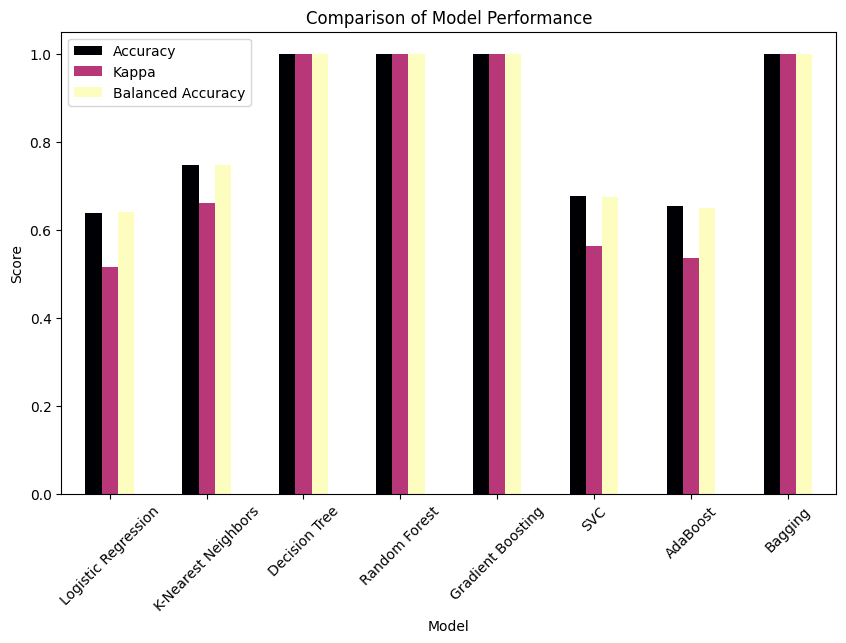

Accuracy: 1.0
Kappa: 1.0
Balanced Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00      1069
        Bajo       1.00      1.00      1.00      1240
  Medio-Alto       1.00      1.00      1.00      1067
  Medio-Bajo       1.00      1.00      1.00      1303

    accuracy                           1.00      4679
   macro avg       1.00      1.00      1.00      4679
weighted avg       1.00      1.00      1.00      4679



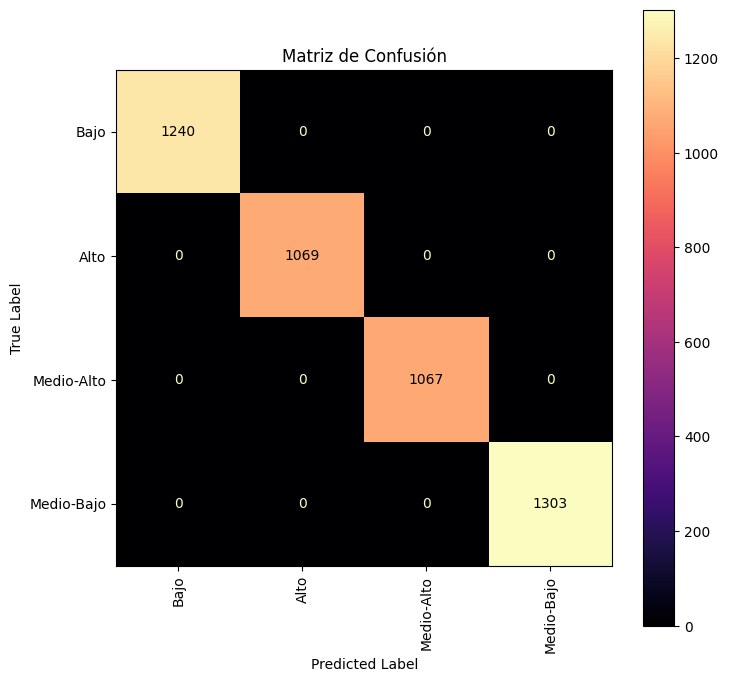

In [ ]:
# Función para entrenar y evaluar cada modelo
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred_val)
    kappa = cohen_kappa_score(y_val, y_pred_val)
    balanced_acc = balanced_accuracy_score(y_val, y_pred_val)

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Kappa": kappa,
        "Balanced Accuracy": balanced_acc
    }

# Almacenar los resultados
results = []

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    result = train_and_evaluate_model(model, X_train_final, y_train_final, X_val, y_val, model_name)
    results.append(result)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Visualizar resultados
print(results_df)

# Graficar resultados con colormap magma
results_df.set_index("Model")[["Accuracy", "Kappa", "Balanced Accuracy"]].plot(
    kind='bar',
    figsize=(10, 6),
    colormap='magma'  # Usar la colormap magma
)
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Evaluar el mejor modelo en el conjunto de prueba
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

# Predecir las etiquetas para el conjunto de prueba
y_pred_test = best_model.predict(X_test)

# Evaluar el mejor modelo
evaluate_model(y_test, y_pred_test, classes)

In [ ]:

# Almacenar los resultados
cv_results = {}

# Realizar la validación cruzada para cada modelo
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_final, y_train_final, cv=5, scoring='accuracy')
    cv_results[model_name] = {
        "Mean Accuracy": cv_scores.mean(),
        "Std Deviation": cv_scores.std(),
        "Cross-validation scores:": cv_scores
    }

# Crear un DataFrame con los resultados
cv_results_df = pd.DataFrame(cv_results).T
print(cv_results_df)

                    Mean Accuracy Std Deviation  \
Logistic Regression      0.632651      0.014149   
K-Nearest Neighbors      0.688522      0.013281   
Decision Tree                 1.0           0.0   
Random Forest                 1.0           0.0   
Gradient Boosting             1.0           0.0   
SVC                      0.645758      0.015591   
AdaBoost                 0.724254      0.048634   
Bagging                       1.0           0.0   

                                              Cross-validation scores:  
Logistic Regression  [0.6229819563152896, 0.630579297245964, 0.6197...  
K-Nearest Neighbors  [0.6904083570750238, 0.6828110161443495, 0.698...  
Decision Tree                                [1.0, 1.0, 1.0, 1.0, 1.0]  
Random Forest                                [1.0, 1.0, 1.0, 1.0, 1.0]  
Gradient Boosting                            [1.0, 1.0, 1.0, 1.0, 1.0]  
SVC                  [0.6752136752136753, 0.6381766381766382, 0.630...  
AdaBoost             [0.74833

In [ ]:

X_test = pd.DataFrame(X_test, columns=X_train.columns)

# Definir los parámetros para GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Inicializar y ajustar GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Imprimir resultados
print("Predicciones:", y_pred)

Predicciones: ['Bajo' 'Bajo' 'Bajo' ... 'Bajo' 'Bajo' 'Bajo']


**Conclusión**

A través del análisis de la "Tasa de Mortalidad Adultos", se logró categorizar los datos de manera efectiva y preparar un conjunto robusto para el modelado. El uso de diversos modelos de aprendizaje automático permitió comparar sus rendimientos, destacando un desempeño excepcional en varios de ellos, especialmente en árboles de decisión y bosques aleatorios, que alcanzaron una precisión del 100% en el conjunto de prueba. Esto indica que los modelos son capaces de clasificar correctamente las categorías de mortalidad, sugiriendo que hay patrones claros en los datos que se pueden aprovechar para la predicción.

# Parte 2: **Aprendizaje no supervisado**

Con el fin de complementar el entendimiento general que podemos obtener de los datasets trabajados, los cuales reflejan la distribución de establecimientos de salud a la largo del país y los que dan cuenta de la mortalidad según causa y región, profundizamos el análisis realizado en la primer mitad de la mentoría con las herramientas de aprendizaje no supervisado.

## Librerías utilizadas

In [ ]:
# Cargamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Cargamos los datos necesarios

Partiremos de los datos provenientes del primer entregable.

In [ ]:
# Especialidades
df_hm_norm = pd.read_csv('https://drive.google.com/uc?export=download&id=1zlFSiMXyhn2jYtBb4honK9JuJs_Fj56o', index_col=0)
# Defunciones
df2 = pd.read_csv('https://drive.google.com/uc?export=download&id=1LbvM2MzeRasEAXoHiGcFqQ73JnWtOi5E')
# Población
df_poblacion = pd.read_csv('https://drive.google.com/uc?export=download&id=1e9AyP77XxKWbb9wTmlGIlejt4o-LlCI7')


## Clustering jerárquico según especialidades por provincia

Utilizaremos los datos del df "df_hm_norm" que contiene el número de especialistas por especialidad (columnas) para cada provincia (filas, index), el cual ya fue procesado:
- Especialidades cada millón de hab.
- Normalizado y escalado (StandardScaler).
- Nombres editados para mejor visualización

Nota: en este caso da igual por cuántos hab se normalizó dado que luego se utiliza el SS.

In [ ]:
# Revisamos los primeros valores.
df_hm_norm.head()


,ALERGIA E INMUNOLOGÍA,ALERGIA E INMUNOLOGÍA PEDIÁTRICA,ANATOMÍA PATOLÓGICA,ANESTESIOLOGÍA,ANGIOLOGÍA GENERAL Y HEMODINAMIA,AUDITORÍA DE SERVICIOS DE SALUD,CARDIOLOGÍA,CARDIOLOGÍA INFANTIL,CIRUGÍA CARDIOVASCULAR,CIRUGÍA CARDIOVASCULAR PEDIÁTRICA,...,RADIOTERAPIA O TERAPIA RADIANTE,REUMATOLOGÍA,REUMATOLOGÍA INFANTIL,SALUD MENTAL (R),SALUD PÚBLICA,TERAPIA INTENSIVA,TERAPIA INTENSIVA INFANTIL,TOCOGINECOLOGÍA,TOXICOLOGÍA,UROLOGÍA
CABA,3.794699,0.629537,3.944202,3.831515,2.245622,1.632067,4.431654,3.850291,4.510463,3.705407,...,4.180569,4.424203,4.336714,-0.208514,2.965963,3.923222,2.449511,3.647205,3.144196,4.134929
TDF,0.218700,-0.339106,1.545268,1.117398,2.479687,0.258687,0.304121,0.638426,0.149932,-0.631079,...,-0.873433,0.385690,-0.451932,-0.208514,0.516653,1.495712,3.074472,1.491551,0.877295,1.364411
NEUQUÉN,-0.209134,-0.339106,0.135336,0.961706,-1.190496,-0.633586,-0.136978,0.934112,-0.358511,0.181845,...,0.373186,-0.571433,-0.451932,-0.208514,0.258214,0.385309,0.451585,0.671243,0.135374,-0.110573
SANTA FE,1.367535,-0.339106,0.714771,0.762256,0.166110,2.839876,0.975061,-0.001036,0.213696,-0.631079,...,0.446152,1.065218,-0.451932,-0.208514,-0.628361,0.159076,1.110367,0.366551,-0.212610,0.624247
RÍO NEGRO,-0.849070,-0.339106,0.058853,0.555385,-0.910061,-0.296118,0.142726,0.276310,0.062607,-0.631079,...,0.602797,-0.510104,0.876854,-0.208514,-0.628361,0.309319,0.277190,0.004933,-0.656216,-0.058831


Como primer aproximación realizaremos un clustering jerárquico con el método de Ward sin conectividad. De esta manera no forzamos la conectividad entre las provincias al no establecer restricciones espaciales, y así el algoritmo tendrá más libertad para agrupar las provincias basándose sólo en las features seleccionadas, deistribución de especialidades, en lugar de la cercanía geográfica.
De igual manera, no definiremos el nro de clusters ni la distancia umbral para no condicionar a los grupos a priori.

In [ ]:
# Instanciamos el modelo

ward = AgglomerativeClustering(linkage= 'ward', n_clusters=None, distance_threshold=0)
ward_etiquetas = ward.fit_predict(df_hm_norm)

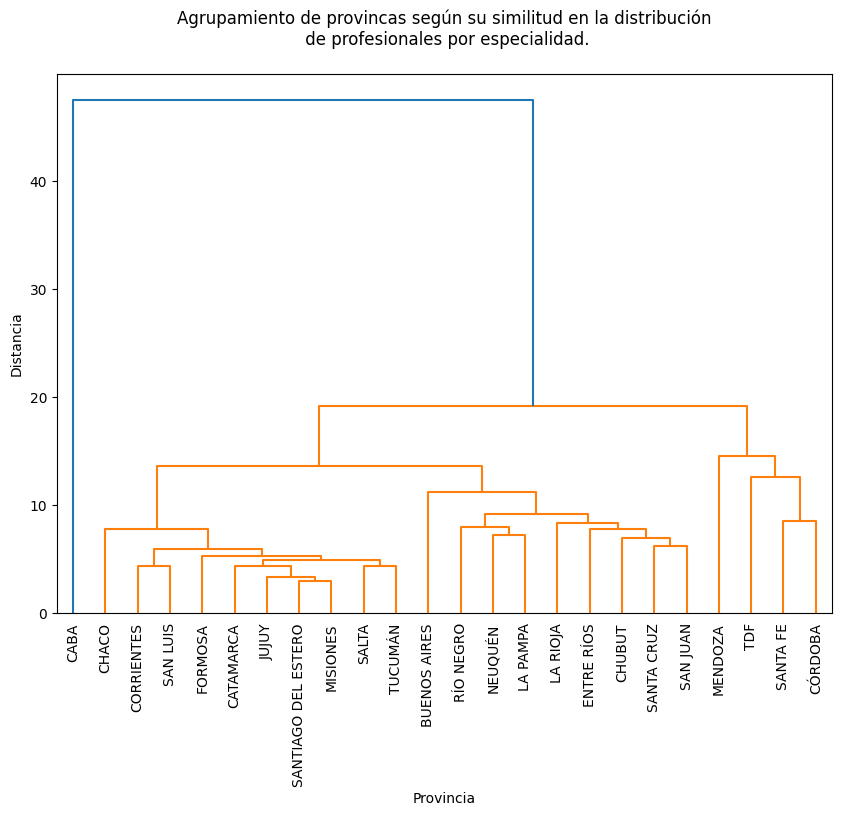

In [ ]:
# Creamos el dentrograma utilizando la función linkage de scipy (que ya computa la matriz de connexión completa)
# Es equivalente a usar el método de arriba pero sin tener que calcular la matriz.

Z = linkage(df_hm_norm, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_hm_norm.index.tolist(), leaf_rotation=90)
plt.title("Agrupamiento de provincas según su similitud en la distribución\n de profesionales por especialidad.\n")
plt.xlabel("Provincia")
plt.ylabel("Distancia")
plt.show()

**Observaciones:**
A partir de este grafico podemos observar ciertas tendencias y patrones que ayudan a tener una idea global de cómo están distribuidas las especialidades medicinales comparativamente entre provincias.
La observación más evidente es la gran diferencia de CABA respecto del resto del país. Esto probablemente se deba a la distribución general de recursos económicos. Como hemos visto en el primer entregable, la mayoría de los establecimientos de salud en el país son privados y lógicamente estarán distribuidos con relación las oportunidades de generar ganacias. Al CABA conentrar buena parte de la actividad económica del país, es esperable que también concentre más recursos de salud.

Por otro lado, se pueden ver otros tres grupos:
- Izquierda: con mayoría de provincias del norte.
- Centro: más heterogéneo pero con mayoría de provincias patagónicas.
- Derecha: centro más TDF.

A modo de resumen podemos decir que,si bien no es total, hay cierta regionalidad en la distribución de especialidades.

Si observamos en el heatmap producido en el entregable anterior, podemos ver como se relaciona este agrupamiento en función de valores individuales. A groso modo podemos ver que el grupo de provincias del norte se diferencia del resto al tener menos especialistas (valores más rojos).

![Heatmap](https://drive.google.com/uc?export=view&id=1OWtghyuFn3xxKrahxeyQaSRVaPn0A1pj)

## Clustering Jerárquico según causas de mortalidad por provincia

### Pre-procesamiento de datos

Para comenzar necesitaremos obtener un df análogo al usado con las especialidades por provincia pero de las diferentes causas de mortalidad. El df de partida será 'df2' que tiene los datos limpios de los años 2019 y 2020. Para esto necesitaremos:

- Agregar los datos de cantidad de defunciones por cada "causa_defuncion" (columnas), por cada "provincia_nombre" (filas).
- Normalizar por cantidad de habitantes.
- Utilizar el StandardScaler.
- Editar nombres para mejor visualización.

In [ ]:
df2.head()

,Unnamed: 0,jurisdiccion_de_residencia_id,provincia_nombre,cie10_causa_id,causa_defuncion,sexo_id,Sexo,muerte_materna_id,muerte_materna_clasificacion,grupo_edad,cantidad,codigo,rango_edad
0,8,70,San Juan,P36,Sepsis bacteriana del recién nacido,1,masculino,Desconocido,Desconocido,01.De a 0 a 14 anios,1,1,De a 0 a 14 anios
1,29,6,Buenos Aires,P05,Retardo del crecimiento fetal y desnutrición f...,2,femenino,Desconocido,Desconocido,01.De a 0 a 14 anios,1,1,De a 0 a 14 anios
2,48,82,Santa Fe,Q89,"Otras malformaciones congénitas, no clasificad...",1,masculino,Desconocido,Desconocido,01.De a 0 a 14 anios,2,1,De a 0 a 14 anios
3,70,82,Santa Fe,P20,Hipoxia intrauterina,2,femenino,Desconocido,Desconocido,01.De a 0 a 14 anios,2,1,De a 0 a 14 anios
4,95,38,Jujuy,Q79,Malformaciones congénitas del sistema osteomus...,1,masculino,Desconocido,Desconocido,01.De a 0 a 14 anios,1,1,De a 0 a 14 anios


In [ ]:
df2[df2['causa_defuncion'] == 'Aborto espontáneo']

,Unnamed: 0,jurisdiccion_de_residencia_id,provincia_nombre,cie10_causa_id,causa_defuncion,sexo_id,Sexo,muerte_materna_id,muerte_materna_clasificacion,grupo_edad,cantidad,codigo,rango_edad
7336,165353,90,Tucumán,O03,Aborto espontáneo,2,femenino,M,muerte materna,02.De 15 a 34 anios,1,2,De 15 a 34 anios


### Advertencia

¿Un sólo aborto espontáneo en el país en dos años?
Con el fin de corroborar que esta observación, que probablemente no represente la realidad, hemos inspeccionado "manualmente" (Excel) el csv de origen, y efectivamente se indica una sóla muerte por aborto espontáneo. Entre 2019 y 2020 en todo el país hay registrados sólo 16 muertes por abortos contando todas sus clases ['Aborto espontáneo', 'Aborto médico', 'Aborto no especificado'].

Esta observación pone en duda la calidad de los datos de origen, lo cual, en un contexto real, amerita una discusión con los otros stakeholders en juego.

Con el proposito de poner en práctica las metodologías aprendidas en la diplomatura, ignoraremos este cuestionamiento.

In [ ]:
# Calculamos la cantidad por causa y provincia
df_def_causa = df2.groupby(['provincia_nombre', 'causa_defuncion'])['cantidad'].sum().reset_index()
df_def_causa.head()


,provincia_nombre,causa_defuncion,cantidad
0,Buenos Aires,"Absceso cutáneo, furúnculo y ántrax",16
1,Buenos Aires,Absceso del pulmón y del mediastino,10
2,Buenos Aires,Absceso y granuloma intracraneal e intrarraquídeo,13
3,Buenos Aires,"Accidente de aeronave sin motor, con ocupante ...",1
4,Buenos Aires,Accidente de transporte no especificado,1


In [ ]:
# Creamos una pivot table para tener los valores más ordenados

df_pivot = df_def_causa.pivot_table(
    index='provincia_nombre',
    columns='causa_defuncion',
    values='cantidad',
    aggfunc='sum',
    fill_value=0
)

In [ ]:
# Procesamos el df
df_pivot.reset_index(inplace=True)
df_pivot.rename_axis(None, axis=1, inplace=True)
df_pivot['provincia_nombre'] = df_pivot['provincia_nombre'].str.upper()

In [ ]:
df_pivot.head()

,provincia_nombre,Aborto espontáneo,Aborto médico,Aborto no especificado,"Absceso cutáneo, furúnculo y ántrax",Absceso de las regiones anal y rectal,Absceso del pulmón y del mediastino,Absceso periamigdalino,Absceso y granuloma intracraneal e intrarraquídeo,"Accidente de aeronave de motor, con ocupante lesionado",...,Várices de otros sitios,Várices esofágicas,"Víctima de avalancha, derrumbe y otros movimientos de tierra",Víctima de rayo,Úlcera de decúbito,"Úlcera de miembro inferior, no clasificada en otra parte",Úlcera duodenal,Úlcera gastroyeyunal,Úlcera gástrica,"Úlcera péptica, de sitio no especificado"
0,BUENOS AIRES,0,0,0,16,0,10,0,13,0,...,1,28,0,0,252,24,43,0,59,16
1,CATAMARCA,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,CHACO,0,0,0,2,0,0,0,0,1,...,0,5,0,0,55,1,3,0,3,1
3,CHUBUT,0,0,0,2,1,0,0,0,0,...,0,5,0,0,1,0,1,0,1,1
4,CIUDAD AUTÓNOMA DE BUENOS AIRES,0,1,0,2,0,4,0,1,1,...,0,5,0,0,242,2,10,0,16,2


In [ ]:
# Merge de los datos de cant hab
def_causas_hab = df_pivot.merge(df_poblacion, left_on='provincia_nombre', right_on='Provincia')
def_causas_hab.drop(columns=['Provincia'], inplace=True)

In [ ]:
# Calcular Nro de especialidades cada 100.000 hab
def_causas_100k = def_causas_hab.copy()
num_cols = [item for item in def_causas_100k.columns if item not in ['provincia_nombre', 'Población 2019']]
n_hab = 100000
for col in num_cols:
    def_causas_100k[col] = def_causas_100k[col].div(def_causas_hab['Población 2019']/n_hab, axis = 0)
def_causas_100k.head()

,provincia_nombre,Aborto espontáneo,Aborto médico,Aborto no especificado,"Absceso cutáneo, furúnculo y ántrax",Absceso de las regiones anal y rectal,Absceso del pulmón y del mediastino,Absceso periamigdalino,Absceso y granuloma intracraneal e intrarraquídeo,"Accidente de aeronave de motor, con ocupante lesionado",...,"Víctima de avalancha, derrumbe y otros movimientos de tierra",Víctima de rayo,Úlcera de decúbito,"Úlcera de miembro inferior, no clasificada en otra parte",Úlcera duodenal,Úlcera gastroyeyunal,Úlcera gástrica,"Úlcera péptica, de sitio no especificado",Unnamed: 0,Población 2019
0,BUENOS AIRES,0.0,0.000000,0.0,0.092112,0.000000,0.057570,0.0,0.074841,0.000000,...,0.0,0.0,1.450765,0.138168,0.247551,0.0,0.339663,0.092112,0.000000,17370144
1,CATAMARCA,0.0,0.000000,0.0,0.242822,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.242822,0.000000,0.000000,0.0,0.242822,0.000000,0.485644,411824
2,CHACO,0.0,0.000000,0.0,0.167699,0.000000,0.000000,0.0,0.000000,0.083849,...,0.0,0.0,4.611711,0.083849,0.251548,0.0,0.251548,0.083849,0.251548,1192616
3,CHUBUT,0.0,0.000000,0.0,0.328553,0.164277,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.164277,0.000000,0.164277,0.0,0.164277,0.164277,0.657107,608729
4,CIUDAD AUTÓNOMA DE BUENOS AIRES,0.0,0.032552,0.0,0.065104,0.000000,0.130207,0.0,0.032552,0.032552,...,0.0,0.0,7.877530,0.065104,0.325518,0.0,0.520828,0.065104,0.032552,3072029


In [ ]:
# Aplicamos el StandardScaler a los datos

def_causas_100k_Pre_ss = def_causas_100k.copy().set_index('provincia_nombre')

sscaler = StandardScaler()

In [ ]:
def_causas_100k_ss = sscaler.fit_transform(def_causas_100k_Pre_ss)
def_causas_100k_ss = pd.DataFrame(def_causas_100k_ss, columns=def_causas_100k_Pre_ss.columns, index=def_causas_100k_Pre_ss.index)

In [ ]:
def_causas_100k_ss.drop(columns=['Población 2019'], inplace=True)

In [ ]:
# Cambio el index para hacer el gráfico más ameno
index_norm = def_causas_100k_ss.index.to_list()
tdf = index_norm.index('TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR')
caba = index_norm.index('CIUDAD AUTÓNOMA DE BUENOS AIRES')
index_norm[tdf] = 'TDF'
index_norm[caba] = 'CABA'
def_causas_100k_ss.index = index_norm

### Creamos el dendrograma

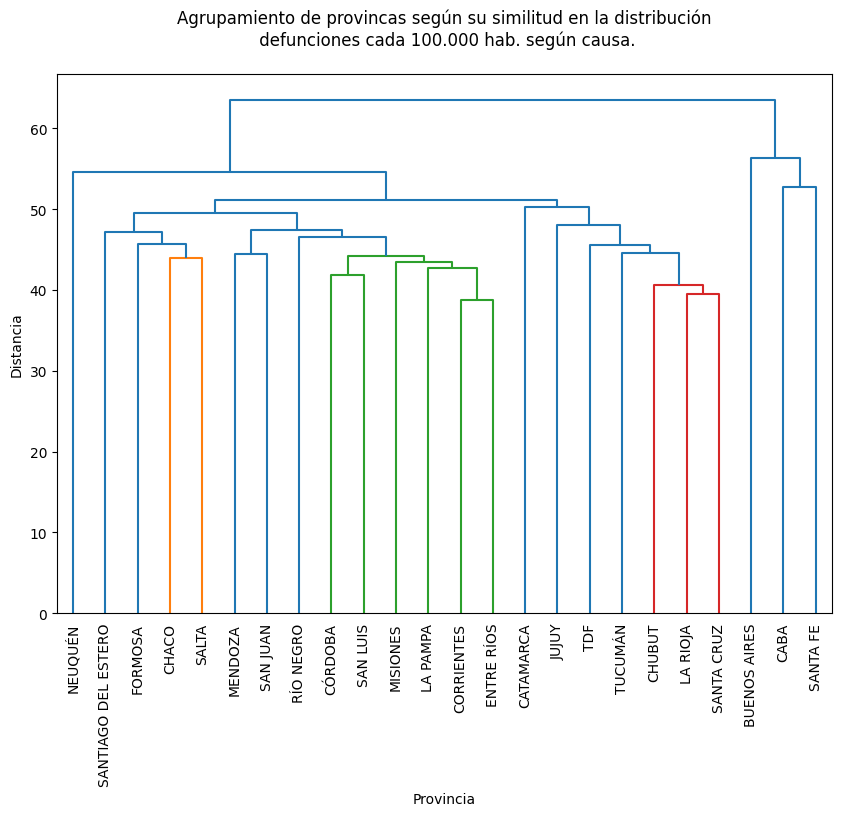

In [ ]:
# Creamos el dentrograma utilizando la función linkage de scipy (que ya computa la matriz de connexión completa)
# Es equivalente a usar el método de arriba pero sin tener que calcular la matriz.

P = linkage(def_causas_100k_ss, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(P, labels=def_causas_100k_ss.index.tolist(), leaf_rotation=90)
plt.title("Agrupamiento de provincas según su similitud en la distribución\n defunciones cada 100.000 hab. según causa.\n")
plt.xlabel("Provincia")
plt.ylabel("Distancia")
plt.show()

**Observación**:
Acá podemos ver que la organización jerárquica de las provincias según causas de muerte se asemeja en poco o nada a la organización jerárquica según distribución de especialidades. Esto nos revela que, aunque ambas variables (causas de muerte y especialidades) están relacionadas con el sistema de salud, sus distribuciones regionales parecen seguir lógicas distintas o tener diferentes factores subyacentes. Por lo tanto, no se pueden agrupar de la misma manera.

## Visualización mediante embeddings

### PCA distribución de especialidades

In [ ]:
pca= PCA(n_components=2) #elegimos 2 que son los que utilizaremos para graficar.

espec_projected = pca.fit_transform(df_hm_norm) # Utilizamos los datos provenientes del standard scaler

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

print ('tamaño de los datos: ', espec_projected.shape)

proporción de varianza por componente:  [0.64555072 0.06195411]
proporción de varianza por componente acumulada:  [0.64555072 0.70750483]
tamaño de los datos:  (24, 2)


In [ ]:
# Sumamos los CP al resto de los datos, incluyendo los clusters

espec_norm_PCA = df_hm_norm.copy()
espec_norm_PCA['PC1'] = list(espec_projected[:,0])
espec_norm_PCA['PC2'] = list(espec_projected[:,1])

In [ ]:
# Con el fin de poder visualizar las diferentes provincias en grupos, clasificamos las mismas en grandes regiones.
regiones = {'CABA' :['CABA'],
            "Pampeana" : ['BUENOS AIRES', 'LA PAMPA', 'CÓRDOBA', 'SANTA FE', 'ENTRE RÍOS'], 'NOA': ['CATAMARCA', 'JUJUY', 'LA RIOJA', 'SALTA', 'SANTIAGO DEL ESTERO', 'TUCUMÁN'],
            'NEA' : ['MISIONES', 'CHACO', 'FORMOSA', 'CORRIENTES'],
            'Cuyo' : ['MENDOZA', 'SAN JUAN', 'SAN LUIS'], 'Patagonia' : ['CHUBUT','NEUQUÉN', 'RÍO NEGRO', 'SANTA CRUZ', 'TDF']}

# Damos vuelta el diccionario

provincia_a_region = {province: region for region, provinces in regiones.items() for province in provinces}

# Agregamos la casificación según región
espec_norm_PCA['Region'] = df_hm_norm.index.map(provincia_a_region)

In [ ]:
provincia_a_region

{'CABA': 'CABA',
 'BUENOS AIRES': 'Pampeana',
 'LA PAMPA': 'Pampeana',
 'CÓRDOBA': 'Pampeana',
 'SANTA FE': 'Pampeana',
 'ENTRE RÍOS': 'Pampeana',
 'CATAMARCA': 'NOA',
 'JUJUY': 'NOA',
 'LA RIOJA': 'NOA',
 'SALTA': 'NOA',
 'SANTIAGO DEL ESTERO': 'NOA',
 'TUCUMÁN': 'NOA',
 'MISIONES': 'NEA',
 'CHACO': 'NEA',
 'FORMOSA': 'NEA',
 'CORRIENTES': 'NEA',
 'MENDOZA': 'Cuyo',
 'SAN JUAN': 'Cuyo',
 'SAN LUIS': 'Cuyo',
 'CHUBUT': 'Patagonia',
 'NEUQUÉN': 'Patagonia',
 'RÍO NEGRO': 'Patagonia',
 'SANTA CRUZ': 'Patagonia',
 'TDF': 'Patagonia'}

In [ ]:
espec_norm_PCA.head()

,ALERGIA E INMUNOLOGÍA,ALERGIA E INMUNOLOGÍA PEDIÁTRICA,ANATOMÍA PATOLÓGICA,ANESTESIOLOGÍA,ANGIOLOGÍA GENERAL Y HEMODINAMIA,AUDITORÍA DE SERVICIOS DE SALUD,CARDIOLOGÍA,CARDIOLOGÍA INFANTIL,CIRUGÍA CARDIOVASCULAR,CIRUGÍA CARDIOVASCULAR PEDIÁTRICA,...,SALUD MENTAL (R),SALUD PÚBLICA,TERAPIA INTENSIVA,TERAPIA INTENSIVA INFANTIL,TOCOGINECOLOGÍA,TOXICOLOGÍA,UROLOGÍA,PC1,PC2,Region
CABA,3.794699,0.629537,3.944202,3.831515,2.245622,1.632067,4.431654,3.850291,4.510463,3.705407,...,-0.208514,2.965963,3.923222,2.449511,3.647205,3.144196,4.134929,32.734950,0.857764,CABA
TDF,0.218700,-0.339106,1.545268,1.117398,2.479687,0.258687,0.304121,0.638426,0.149932,-0.631079,...,-0.208514,0.516653,1.495712,3.074472,1.491551,0.877295,1.364411,4.057182,-6.856408,Patagonia
NEUQUÉN,-0.209134,-0.339106,0.135336,0.961706,-1.190496,-0.633586,-0.136978,0.934112,-0.358511,0.181845,...,-0.208514,0.258214,0.385309,0.451585,0.671243,0.135374,-0.110573,0.930044,-1.320413,Patagonia
SANTA FE,1.367535,-0.339106,0.714771,0.762256,0.166110,2.839876,0.975061,-0.001036,0.213696,-0.631079,...,-0.208514,-0.628361,0.159076,1.110367,0.366551,-0.212610,0.624247,4.667453,0.591575,Pampeana
RÍO NEGRO,-0.849070,-0.339106,0.058853,0.555385,-0.910061,-0.296118,0.142726,0.276310,0.062607,-0.631079,...,-0.208514,-0.628361,0.309319,0.277190,0.004933,-0.656216,-0.058831,-0.451595,-0.858000,Patagonia


In [ ]:
import plotly.express as px

# Creamos una columna con el nombre de las provincias para que aparezca cuando señalamos el punto
espec_norm_PCA['Provincia'] = espec_norm_PCA.index
espec_norm_PCA['Punto'] = 4

# Create a Plotly scatter plot
fig = px.scatter(
    espec_norm_PCA,
    x='PC1',
    y='PC2',
    hover_name='Provincia',  # Display the index when hovering
    title='Componentes principales para la distribución de especialidades',
    color='Region',
    size = 'Punto',
    opacity = 0.7
)

# Show the interactive plot
fig.show()

**Observaciones**:
- Con sólo dos componentes se puede explicar un 70% de la varianza, lo cual da sustento a este tipo de representación.
- Consistente con lo observado en el dendrograma, se ve que CABA tiene una distribución de especialidades muy distinta al resto del país.

Con el fin de evaluar si excluyendo los datos de CABA se pueden diferenciar mejor el resto de las provincias, repetimos el análisis sin CABA.

Observaciones:

Explicación de la varianza: Con solo dos componentes principales, podemos explicar el 70% de la varianza, lo que justifica esta representación en términos de reducción dimensional.
Diferencias regionales: Al igual que lo observado en el dendrograma, CABA presenta una distribución de especialidades claramente diferenciada del resto del país, lo que refuerza la idea de que su perfil es único.
Siguiente paso: Para evaluar si la exclusión de CABA mejora la diferenciación entre el resto de las provincias, repetiremos el análisis sin los datos de CABA

In [ ]:
# Quitamos los datos de CABA
esp_sin_CABA = df_hm_norm.copy().drop('CABA')

espec_proj_sinCABA = pca.fit_transform(esp_sin_CABA) # Utilizamos los datos provenientes del standard scaler

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

print ('tamaño de los datos: ', espec_proj_sinCABA.shape)

# Sumamos los CP al resto de los datos, incluyendo los clusters

espec_sinCABA_PCA = esp_sin_CABA.copy()
espec_sinCABA_PCA['PC1'] = list(espec_proj_sinCABA[:,0])
espec_sinCABA_PCA['PC2'] = list(espec_proj_sinCABA[:,1])

# Agregamos la casificación según región
espec_sinCABA_PCA['Region'] = esp_sin_CABA.index.map(provincia_a_region)

# Creamos una columna con el nombre de las provincias para que aparezca cuando señalamos el punto
espec_sinCABA_PCA['Provincia'] = espec_sinCABA_PCA.index
espec_sinCABA_PCA['Punto'] = 4

# Create a Plotly scatter plot
fig = px.scatter(
    espec_sinCABA_PCA,
    x='PC1',
    y='PC2',
    hover_name='Provincia',  # Display the index when hovering
    title='Componentes principales para la distribución de especialidades (sin CABA)',
    color='Region',
    size = 'Punto',
    opacity = 0.7
)

# Show the interactive plot
fig.show()

proporción de varianza por componente:  [0.29571831 0.13954615]
proporción de varianza por componente acumulada:  [0.29571831 0.43526446]
tamaño de los datos:  (23, 2)


**Observaciones**:

- Las dos CP siguen explicando una proporción importante de la varianza (sobretodo el CP1).
- Observando el comportamiento respecto al CP1 vemos una diferencia entre el norte y el resto del país:

    NOA y NEA se posicionan a la izquierda y Patagonia y Pampeana se posicionan a la derecha, a excepción de Santa Cruz, observándose la divisoria en el cero. Por otro lado la región de Cuyo se encuentra más dispersa.

### PCA para la distribución de causa de mortalidad

Aplicamos el PCA a los datos de mortalidad según causa y provincia.

In [ ]:
#def_causas_100k_ss

causas_projected = pca.fit_transform(def_causas_100k_ss) # Utilizamos los datos provenientes del standard scaler

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

print ('tamaño de los datos: ', causas_projected.shape)

proporción de varianza por componente:  [0.08620014 0.06731722]
proporción de varianza por componente acumulada:  [0.08620014 0.15351735]
tamaño de los datos:  (24, 2)


In [ ]:
# Sumamos los CP al resto de los datos, incluyendo los clusters

causas_norm_PCA = def_causas_100k_ss.copy()
causas_norm_PCA['PC1'] = list(causas_projected[:,0])
causas_norm_PCA['PC2'] = list(causas_projected[:,1])

# Agregamos la casificación según región
causas_norm_PCA['Region'] = causas_norm_PCA.index.map(provincia_a_region)

In [ ]:
# Creamos una columna con el nombre de las provincias para que aparezca cuando señalamos el punto y una con el tamaño de punto
causas_norm_PCA['Provincia'] = causas_norm_PCA.index
causas_norm_PCA['Punto'] = 4

# Create a Plotly scatter plot
fig = px.scatter(
    causas_norm_PCA,
    x='PC1',
    y='PC2',
    hover_name='Provincia',  # Display the index when hovering
    title='Componentes principales para la distribución de causas de mortalidad',
    color='Region',
    size = 'Punto',
    opacity = 0.7
)

# Show the interactive plot
fig.show()

**Conclusión**: A diferencia de la proyección de la distribución de especialidades, que los dos CP logran explicar gran parte de la varianza, los CP según causa de muerte logran explicar apenas un 15% de la varianza. Por otro lado, las provincias que se distancian del resto son otras (excepto CABA).

## KMeans clustering

Completaremos el análisis multivariado realizando el clustering para K= 5 y 6 (para ver si CABA va por separado). Luego veremos como se relacionan los clusters con la clasificación por regiones.

### Especialidades por provincia

In [ ]:
# Entrenamos el dataset para 5 clusters

km5 = KMeans(n_clusters= 5)
km5.fit(df_hm_norm) #utiliza todas los atributos numéricos seleccionados

# Etiquetas asignadas por el algoritmo
clusters_5 = km5.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster(5)=Inertia= ', km5.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster(5)=Inertia=  537.6710300264195


In [ ]:
# Entrenamos el dataset para 5 clusters

km6 = KMeans(n_clusters= 6)
km6.fit(df_hm_norm) #utiliza todas los atributos numéricos seleccionados

# Etiquetas asignadas por el algoritmo
clusters_6 = km6.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster(6)=Inertia= ', km6.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster(6)=Inertia=  522.6041071956319


In [ ]:
# Creamos un df con los clusters asignados y la región geográfica
especialidades_clusters = df_hm_norm.copy()
especialidades_clusters['kmeans_5'] = km5.labels_ #clusters
especialidades_clusters['kmeans_6'] = km6.labels_ #clusters

especialidades_clusters['Region'] = especialidades_clusters.index.map(provincia_a_region)
especialidades_clusters.head(4)

,ALERGIA E INMUNOLOGÍA,ALERGIA E INMUNOLOGÍA PEDIÁTRICA,ANATOMÍA PATOLÓGICA,ANESTESIOLOGÍA,ANGIOLOGÍA GENERAL Y HEMODINAMIA,AUDITORÍA DE SERVICIOS DE SALUD,CARDIOLOGÍA,CARDIOLOGÍA INFANTIL,CIRUGÍA CARDIOVASCULAR,CIRUGÍA CARDIOVASCULAR PEDIÁTRICA,...,SALUD MENTAL (R),SALUD PÚBLICA,TERAPIA INTENSIVA,TERAPIA INTENSIVA INFANTIL,TOCOGINECOLOGÍA,TOXICOLOGÍA,UROLOGÍA,kmeans_5,kmeans_6,Region
CABA,3.794699,0.629537,3.944202,3.831515,2.245622,1.632067,4.431654,3.850291,4.510463,3.705407,...,-0.208514,2.965963,3.923222,2.449511,3.647205,3.144196,4.134929,1,1,CABA
TDF,0.218700,-0.339106,1.545268,1.117398,2.479687,0.258687,0.304121,0.638426,0.149932,-0.631079,...,-0.208514,0.516653,1.495712,3.074472,1.491551,0.877295,1.364411,0,4,Patagonia
NEUQUÉN,-0.209134,-0.339106,0.135336,0.961706,-1.190496,-0.633586,-0.136978,0.934112,-0.358511,0.181845,...,-0.208514,0.258214,0.385309,0.451585,0.671243,0.135374,-0.110573,4,2,Patagonia
SANTA FE,1.367535,-0.339106,0.714771,0.762256,0.166110,2.839876,0.975061,-0.001036,0.213696,-0.631079,...,-0.208514,-0.628361,0.159076,1.110367,0.366551,-0.212610,0.624247,4,2,Pampeana


In [ ]:
# Vemos rápidamente cómo se distribuyen los clusters según región para Kmeans = 5
print('Distribución de clusters por región geográfica KMeans = 5\n   Col izq. = Nro de cluster\n   Col der.= Provincias asignadas')
especialidades_clusters.groupby('Region')['kmeans_5'].value_counts()

Distribución de clusters por región geográfica KMeans = 5
   Col izq. = Nro de cluster
   Col der.= Provincias asignadas


Region     kmeans_5
CABA       1           1
Cuyo       2           1
           3           1
           4           1
NEA        2           4
NOA        2           5
           4           1
Pampeana   4           4
           0           1
Patagonia  4           4
           0           1
Name: count, dtype: int64

**Observaciones**:

- CABA tiene su cluster único (único en ser asignado al cluster 1), lo cual es consistente con lo visto anteriormente.
- El cluster 0 agrupa provincias de todo el país: todas las del norte, algunas pampeanas, algunas de cuyo y algunas de la patagonia.
- El cluster 3 representa a más de la mitad de las patagónicas y a ninguna otra.
- El cluster 4 representa a menos de la mitad de las pampeanas y a ninguna otra.
- El cluster 2 sólo representa a una provincia de cuyo.

Por lo que vemos cierta regionalidad pero con varias excepciones.

In [ ]:
# Vemos rápidamente cómo se distribuyen los clusters según región para Kmeans = 6
print('Distribución de clusters por región geográfica KMeans = 6\n   Col izq. = Nro de cluster\n   Col der.= Provincias asignadas')
especialidades_clusters.groupby('Region')['kmeans_6'].value_counts()

Distribución de clusters por región geográfica KMeans = 6
   Col izq. = Nro de cluster
   Col der.= Provincias asignadas


Region     kmeans_6
CABA       1           1
Cuyo       2           2
           3           1
NEA        3           4
NOA        3           5
           0           1
Pampeana   2           3
           4           1
           5           1
Patagonia  2           3
           3           1
           4           1
Name: count, dtype: int64

Este clustering no aporta más claridad dado que ya con 5 clusters CABA se diferencia del resto.

Con el fin de determinar analíticamente cuál sería un número de clusters ideal, realizaremos el gráfico del codo representado la inercia en función del número de clusters.

Text(0.5, 1.0, 'Inercia de k-Means versus el número de clusters')

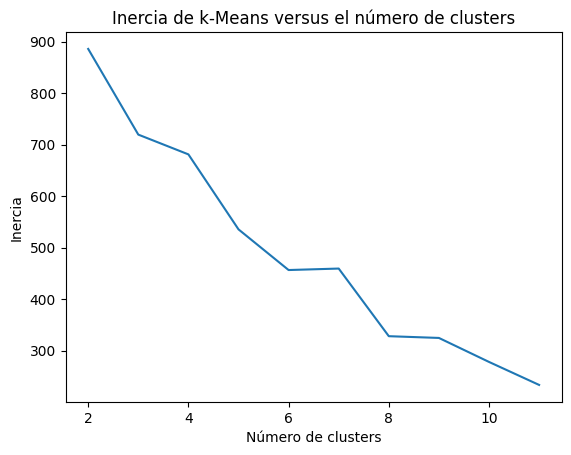

In [ ]:
# Gráfico del codo

scores = [KMeans(n_clusters=i).fit(df_hm_norm).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Número de clusters')
plt.ylabel("Inercia")
plt.title("Inercia de k-Means versus el número de clusters")

**Interpretación:** El método del códo se basa en determinar un número de clusters donde existe una inflexión donde la pendiente de caida de la inercia decrece (de aquí lo de codo). En la gráfica no podemos ver un cambio notorio en la pendiente, siendo la relación cuasi-lineal, por lo que no permite determinar un número óptimo de clusters en los cuales distribuir/clasificar las provincias del país.

# Parte 3: ***DOCTOR VOY APP***

El objetivo de este programa (Aplicación: "DOCTOR VOY") es presentar una funcionalidad interactiva que permita a un potencial usuario obtener las instituciones sanitarias más cercanas a una dirección ingresada como parámetro de entrada.

In [ ]:
pip install folium geopy

: 

In [ ]:
!pip install ipywidgets

: 

In [ ]:
from IPython.display import display

: 

Desde el sitio web del Sistema Integrado de Información Sanitaria Argentino (https://sisa.msal.gov.ar/sisa/) se obtiene un archivo en formato excel (refes_registros_federal_de_establecimientos_de_salud_12-09-2024.xlsx) que brinda datos de todas las instituciones sanitarias tanto públicas como privadas del país.

In [ ]:
import pandas as pd
from google.colab import files

# Leer el archivo Excel en un DataFrame
filepath = 'https://docs.google.com/spreadsheets/d/1scJrAyA0JsNiD0b1mOxpQitum2Sjyi4i/export?format=xlsx'

df = pd.read_excel(filepath, engine='openpyxl')
print(df.head())  # Mostrar las primeras filas del DataFrame

: 

In [ ]:
# Revisar la info del dataframe obtenido
df.info()

: 

In [ ]:
# Quitar las columnas que no se utilizarán. Sólo quedarán el nombre de la institución, la categoría_tipología, el domicilio y las coordenadas (latitud y longitud)
df_new = df.drop(columns=['CODIGO', 'GLN', 'CODIGO_TIPOLOGIA', 'TIPOLOGIA', 'CODIGO_CATEGORIA_TIPOLOGIA', 'CODIGO_DEPENDENCIA', 'DEPENDENCIA', 'ORIGEN_FINANCIAMIENTO', 'CODIGO_PROVINCIA', 'PROVINCIA', 'CODIGO_DEPARTAMENTO', 'DEPARTAMENTO', 'CODIGO_LOCALIDAD', 'LOCALIDAD', 'CP', 'TE1', 'TE2', 'TE3', 'TE4', 'ESTADO_GEO'])

: 

In [ ]:
# Revisar la info del dataframe obtenido
df_new.info()

: 

In [ ]:
# Eliminar registros con "nan"
df_final = df_new.dropna()

: 

In [ ]:
# Revisar la info del dataframe obtenido
df_final.info()

: 

A continuación, se solicita al usuario ingresar una dirección geográfica, y un valor máximo de distancia que puede trasladarse. A partir de esos parámetros, se efectúa una conversión a latitud y longitud. Además, se muestra un desplegable de opciones para que el usuario pueda elegir qué servicio/tipología desea filtrar. Además, en pantalla aparece un botón para que, al hacer click, se confirme la selección. Con esa información, se procede a calcular las distancias con respecto a los datos de coordenadas de cada institución sanitaria almacenada en el dataframe, y luego se ordenan esas distancias de manera ascendente (desde la más cercana hasta la más lejana), mostrando las más cercanas respecto a la dirección geográfica de entrada.

In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic
import sys

from geopy.geocoders import Nominatim

import ipywidgets as widgets
from IPython.display import display

# Variable global para almacenar el DataFrame filtrado
df_filtrado_global = pd.DataFrame()

def solicitar_distancia_mayor_que_cero():
    while True:
        try:
            # Solicitar al usuario ingresar una distancia
            dist_maxima = float(input("Ingrese la distancia máxima que puede trasladarse el usuario (en KM): "))

            # Verificar si el valor es mayor a 0
            if dist_maxima > 0:
                print(f"El valor ingresado es: {dist_maxima}")
                return dist_maxima
                break
            else:
                print("Error: El valor debe ser mayor a 0. Intente nuevamente.")

        except ValueError:
            # Captura si el valor ingresado no es un número flotante válido
            print("Error: Ingrese un número válido.")

# Función para convertir una dirección en coordenadas
def direccion_a_coordenadas(direccion):
    # Inicializar el geocodificador
    geolocator = Nominatim(user_agent="mi_aplicacion_geopy")

    # Obtener la ubicación a partir de la dirección
    ubicacion = geolocator.geocode(direccion)

    # Verificar si se encontró la dirección
    if ubicacion:
        return (ubicacion.latitude, ubicacion.longitude)
    else:
        return None

# Función para calcular la distancia entre dos puntos usando Haversine
def calcular_distancia(lat1, lon1, lat2, lon2):
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)
    return geodesic(point1, point2).kilometers

# Función para encontrar las localizaciones más cercanas
def encontrar_localizaciones_cercanas(latitud_referencia, longitud_referencia, dataset, distanciamax):
    # Crear una lista para almacenar las distancias calculadas
    distancias = []
    cantidad_establecimientos = 0

    # Calcular la distancia para cada localización
    for index, row in dataset.iterrows():
        lat = row['LATITUD']
        lon = row['LONGITUD']
        nombre = row['NOMBRE']
        domicilio = row['DOMICILIO']

        # Calcular la distancia desde la referencia
        distancia = calcular_distancia(latitud_referencia, longitud_referencia, lat, lon)

        # Considerar los registros correspondientes a la distancia límite que puede viajar el usuario
        if distancia <= distanciamax:

          # Añadir el nombre de la ubicación y la distancia a la lista
          distancias.append({'nombre': nombre, 'latitud': lat, 'longitud': lon, 'distancia': distancia, 'domicilio': domicilio})
          cantidad_establecimientos += 1

    # Convertir la lista de distancias a un DataFrame
    distancias_df = pd.DataFrame(distancias)

    # Ordenar el DataFrame por la distancia en orden ascendente
    distancias_df = distancias_df.sort_values(by='distancia')

    # Devolver las 'n' localizaciones más cercanas
    return distancias_df.head(cantidad_establecimientos)

# Función que se ejecuta cuando el usuario hace una selección
def filtrar_dataframe(change):
    global df_filtrado_global
    if change['type'] == 'change' and change['name'] == 'value':
        # Filtrar el DataFrame según la opción seleccionada
        servicio_seleccionado = change['new']

        # Si se selecciona 'Todos', mostrar todo el DataFrame
        if servicio_seleccionado == 'Todos':
            df_filtrado_global = df_final
        else:
            # Filtrar el DataFrame según el servicio seleccionado
            df_filtrado_global = df_final[df_final['CATEGORIA_TIPOLOGIA'] == servicio_seleccionado]

# Función que se ejecuta cuando el botón es presionado
def mostrar_dataframe(b):
    # Mostrar el DataFrame original
    print("DataFrame original:")
    display(df_final)

    # Mostrar el DataFrame filtrado
    if not df_filtrado_global.empty:
        print(f"\nFiltrando por servicio: {desplegable.value}")
        display(df_filtrado_global)
    else:
        print("No se ha seleccionado un servicio o el filtro no tiene resultados.")

#---------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------
# EJECUCIÓN
#---------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------

# Solicitar la dirección al usuario
direccion = input("Ingrese la dirección (sin acentos, el formato es 'dirección, ciudad, país': ): ")

# Distancia máxima que puede trasladarse el usuario
dist_maxima = solicitar_distancia_mayor_que_cero()

# Convertir la dirección a coordenadas
coordenadas = direccion_a_coordenadas(direccion)

# Mostrar las coordenadas
if coordenadas:
    print(f"Las coordenadas de '{direccion}' son: Latitud = {coordenadas[0]}, Longitud = {coordenadas[1]}")
else:
    print(f"No se pudo encontrar la dirección: {direccion}")
    # Forzar la terminación del programa
    sys.exit()


latitud_ref = coordenadas[0]
longitud_ref = coordenadas[1]

# Definir las opciones del desplegable, incluyendo la opción 'Todos'
# Generar una lista de servicios únicos ordenados alfabéticamente
opciones = sorted(df_final['CATEGORIA_TIPOLOGIA'].unique())
opciones = ['Todos'] + opciones

# Crear el widget de selección desplegable
desplegable = widgets.Dropdown(
    options=opciones,
    value=opciones[0],  # Valor predeterminado
    description='Servicio:',
    disabled=False
)

# Crear el botón para confirmar la selección
boton_confirmar = widgets.Button(description="Confirmar selección")

# Vincular el evento de cambio a la función de filtrado
desplegable.observe(filtrar_dataframe)

# Vincular el evento del botón a la función mostrar_dataframe
boton_confirmar.on_click(mostrar_dataframe)

# Mostrar el desplegable y el botón en la pantalla
display(desplegable, boton_confirmar)

: 

In [ ]:
# Función para calcular la distancia entre dos puntos usando Haversine
def calcular_distancia(lat1, lon1, lat2, lon2):
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)
    return geodesic(point1, point2).kilometers

# Función para encontrar las localizaciones más cercanas
def encontrar_localizaciones_cercanas(latitud_referencia, longitud_referencia, dataset, distanciamax):
    # Crear una lista para almacenar las distancias calculadas
    distancias = []
    cantidad_establecimientos = 0

    # Calcular la distancia para cada localización
    for index, row in dataset.iterrows():
        lat = row['LATITUD']
        lon = row['LONGITUD']
        nombre = row['NOMBRE']
        domicilio = row['DOMICILIO']

        # Calcular la distancia desde la referencia
        distancia = calcular_distancia(latitud_referencia, longitud_referencia, lat, lon)

        # Considerar los registros correspondientes a la distancia límite que puede viajar el usuario
        if distancia <= distanciamax:

          # Añadir el nombre de la ubicación y la distancia a la lista
          distancias.append({'nombre': nombre, 'latitud': lat, 'longitud': lon, 'distancia': distancia, 'domicilio': domicilio})
          cantidad_establecimientos += 1

    # Verificar si se encontraron localizaciones dentro del rango
    if distancias:
        # Convertir la lista de distancias a un DataFrame
        distancias_df = pd.DataFrame(distancias)

        # Ordenar el DataFrame por la distancia en orden ascendente
        distancias_df = distancias_df.sort_values(by='distancia')

        # Devolver las localizaciones dentro del rango de distancia
        return distancias_df.head(cantidad_establecimientos)
    else:
        # Devolver un mensaje si no hay localizaciones dentro del rango
        print("No se encontraron localizaciones dentro del rango de distancia.")
        return pd.DataFrame()

#---------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------
# EJECUCIÓN
#---------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------

df_filtrado_global.info()

# Encontrar las localizaciones más cercanas
localizaciones_cercanas = encontrar_localizaciones_cercanas(latitud_ref, longitud_ref, df_filtrado_global, dist_maxima)

# Mostrar las localizaciones cercanas, si existen
if not localizaciones_cercanas.empty:
    print(localizaciones_cercanas)
else:
    print("No hay localizaciones dentro del rango especificado.")

: 

Por último, se muestran en un mapa esas instituciones más cercanas al punto de referencia:

In [ ]:
# Función para generar el mapa con las localizaciones más cercanas
def generar_mapa_localizaciones_cercanas(latitud_referencia, longitud_referencia, dataset):

    # Crear el mapa centrado en la localización de referencia
    mapa = folium.Map(location=[latitud_ref, longitud_ref], zoom_start=11)

    # Añadir un marcador para la localización de referencia
    folium.Marker(
        [latitud_ref, longitud_ref],
        popup="Punto de referencia",
        icon=folium.Icon(color='blue')
    ).add_to(mapa)

    # Añadir marcadores para las localizaciones más cercanas
    for index, row in localizaciones_cercanas.iterrows():
        lat = row['latitud']
        lon = row['longitud']
        nombre = row['nombre']
        domicilio = row['domicilio']
        distancia = row['distancia']

        # Añadir un marcador para cada localización cercana
        folium.Marker(
            [lat, lon],
            popup=f"{nombre} ( La distancia al punto de referencia es de  {distancia:.2f} km)  -  {domicilio}",
            icon=folium.Icon(color='red')
        ).add_to(mapa)

    # Devolver el mapa
    return mapa

if not localizaciones_cercanas.empty:
    print(localizaciones_cercanas)

else:
    print("No hay localizaciones dentro del rango especificado.")
    # Forzar la terminación del programa
    sys.exit()

#---------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------
# EJECUCIÓN
#---------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------

# Generar el mapa con las localizaciones más cercanas
mapa = generar_mapa_localizaciones_cercanas(latitud_ref, longitud_ref, df)

# Mostrar el mapa
mapa

: 

# Aplicación Web - Streamlit

Con el fin de poder hacer utilizable para cualquier usuario la aplicación desarrollada en el punto anterior, la estamos poniendo a punto con la librería streamlit. Puede accederse a la misma mediante el siguiente link:

https://saludestablecimientosapp-2024.streamlit.app/

Ajustaremos la interfaz y la funcionalidad de la misma para la entrega final.